# Reconocimiento de Actividades Humanas Usando Deep Learning

Autores:

- Javier Alejandro Valencia Estrada.
- Diego Alejandro Rodriguez Garcia.
- Cristhian Alexander Torres Polanco.
- Luis Eduardo Solarte Riascos.

# INTRODUCCIÓN:

El reconocimiento de actividades humanas es un campo en crecimiento, impulsado por la disponibilidad de dispositivos portátiles y sensores integrados en smartphones.

Este proyecto tiene como objetivo clasificar actividades humanas utilizando datos de acelerómetros y algoritmos de aprendizaje profundo. Las actividades clasificadas incluyen caminar, correr, sentarse, subir y bajar gradas.

Objetivos del Proyecto:

1.	Diseñar y entrenar modelos basados en deep learning para la clasificación de actividades.

2.	Evaluar el rendimiento de cada modelo y compararlos en términos de precisión y métricas asociadas.

3.	Explorar la integración del sistema en dispositivos móviles para aplicaciones prácticas en el monitoreo de salud.




# MARCO TEORICO

El Reconocimiento de Actividades Humanas (HAR, por sus siglas en inglés) se refiere al uso de tecnologías para identificar y clasificar las acciones que realiza una persona mediante datos provenientes de sensores, esto es clave en aplicaciones como el monitoreo de salud, los sistemas de seguridad, y las interfaces inteligentes para el hogar y dispositivos móviles.

1. Datos Temporales y Sensores Acelerómetros:
Los acelerómetros, disponibles en dispositivos móviles, detectan cambios en la aceleración en los ejes X, Y y Z. Estos datos temporales son fundamentales para el análisis de actividades como caminar, correr, y subir escaleras, debido a los patrones repetitivos que generan.

2. Procesamiento de Señales:
Para comprender las actividades humanas, los datos crudos de los acelerómetros requieren transformación, con herramientas como espectrogramas convierten señales temporales en representaciones espectrales que capturan características de frecuencia.

3. Modelos de Aprendizaje Profundo:
Modelos como Redes Neuronales Convolucionales (CNN), Redes Neuronales Recurrentes (RNN), y Perceptrón Multicapa (MLP) son ampliamente utilizados en HAR. Las CNN son eficaces para capturar patrones locales, las RNN son ideales para relaciones temporales, y los MLP ofrecen soluciones rápidas para datos tabulares.



## DESCRIPCIÓN DEL PROBLEMA.

El reconocimiento de actividades humanas es crítico para diversas aplicaciones, pero presenta retos significativos:

1. Complejidad de Datos:
Los datos generados por acelerómetros son ruidosos y complejos, con variaciones debidas a diferencias individuales o en el entorno.

2. Dependencias Temporales:
Determinadas actividades (como correr o caminar) tienen patrones temporales específicos que requieren modelos avanzados para su identificación.

3. Eficiencia y Generalización:
Es necesario diseñar sistemas que sean eficientes en términos computacionales y que generalicen bien a datos no vistos.


## OBJETIVO DEL PROYECTO.

Diseñar un sistema automatizado para reconocer actividades humanas utilizando datos de sensores de aceleración de teléfonos móviles. El sistema debe:

  - Clasificar actividades comunes como caminar, correr, subir y bajar escaleras, y estar sentado.
  - Comparar distintos modelos de aprendizaje profundo para determinar el enfoque más efectivo.
  


## PLANTEAMIENTO DE LA SOLUCIÓN.

1. Recopilación y Preprocesamiento de Datos:

    - Los datos fueron obtenidos de sensores aceletometros del celular organizados por actividad en archivos CSV.
    - El preprocesamiento incluyo la normalizacion y generacion de espectrogramas para su vusualizacion.

2. Implemantación de Modelos de Aprendizaje Profundo

    - MLP: Modelo denso para reconocimiento de patrones basicos
    - CNN: Una red para capturar caracteristicas locales en las señanes.
    - RNN: Modelo de red recurrente

3. Entrenamiento y Evaluación

    - Entrenamiento de los modelos en conjunto de datos separados (entrenamiento, validacion,prueba)
    - Las metricas para evaluar el rendimiento de los modelos como precisión, exactitud, recall y F1-score.

4. Visualización y Prediccion.

    - Se genera espectograma para representar las actividades.
    - Se deseña una prueba con muestras aleatorias para verificar las predicciones de los modelos.

5. Integración en un Sistema de Tiempo Real

    - Se plantea la integración del modelo en una aplicación movil que envie alertas basadas en las actividades detectadas.

## DESARROLLO DEL PROYECTO


Para la toma de muestras se utilizaron los celulares de los compañeros integrantes del grupo.

Se almacenaron en una carpeta HA la cual se carga a la cuenta de google Drive de donde se leen ya se procesan los datos.

# Montar la cuenta de GoogleDrive en el entorno de Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Librerias utilizadas para el proyecto.

In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
from glob import glob
from tensorflow.keras.utils import plot_model
from PIL import Image



#1. Recopilacion y Preporcesamiento de Datos

-	Fuente de Datos: Sensores de acelerómetro de smartphones.
-	Actividades Registradas: correr, caminar, sentado, subir_gradas, y bajar_gradas.
-	Formato: Archivos CSV con columnas: time, seconds_elapsed, x, y, z.


# PREPROCESAMIENTO DE DATOS.

Una vez recolectada la información y cargada en el Drive se procede a trabajar la información Etiquetando los datos y creando una función para la lectura y cargue de de los datos por cada actividad

In [3]:
# Definir ruta principal de los datos
data_path = '/content/drive/MyDrive/HA'

# Mapear actividades con etiquetas
activity_labels = {
    'correr': 0,
    'caminar': 1,
    'sentado': 2,
    'subir_gradas': 3,
    'bajar_gradas': 4
}

def load_data(data_path, activity_labels):
    data = []
    labels = []

    # Recorrer cada carpeta de actividad
    for activity, label in activity_labels.items():
        activity_folder = os.path.join(data_path, activity)
        csv_files = glob(os.path.join(activity_folder, '*.csv'))

        for file in csv_files:
            # Cargar CSV
            df = pd.read_csv(file)

            # Solo seleccionar las columnas 'x', 'y', 'z' (puedes ajustar según sea necesario)
            sensor_data = df[['x', 'y', 'z']].values

            # Añadir los datos y la etiqueta correspondiente
            data.append(sensor_data)
            labels.append(label)

    # Convertir a numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    return data, labels




- La función permite definir una ruta donde se encuentran los datos, se mapea las diferentes actividades con etiquetas númericas.

- Se cargan los datos desde archivos .SCV que se encuentran organizados en carpetas por actividad segun la siguiente estructura.

 HA de MyDrive de google  

       /correr
           correr_1.csv
           correr_2.csv
           ...
       /caminar
           caminar_1.csv
           caminar_2.csv
           ...
       /sentado
           sentado_1.csv
           sentado_2.csv
           ...
       /subir_gradas
            subir_gradas_1.csv
            subir_gradas_2.csv
            ...
       /bajar_gradas
            bajar_gradas_1.csv
            bajar_gradas_2.csv


- Se crea la funcion pad_sequences para garantizar que las secuencias tengan la misma longitud rellenando con ceros.

- Se crea la función load_data que carga los datos desde los archivos .CSV, selecciona las caracteristicas relevantes y asigna etiquetas numericas.

In [4]:
# Se crea una Función para rellenar las secuencias con ceros para que tengan la
# misma longitud
def pad_sequences(sequences, max_len=None, padding_value=0):
    if not max_len:
        max_len = max(len(seq) for seq in sequences)
    return np.array([np.pad(seq, ((0, max_len - len(seq)), (0, 0)), mode='constant', constant_values=padding_value) for seq in sequences])

def load_data(data_path, activity_labels):
    data = []
    labels = []

    # Recorrer cada carpeta de actividad
    for activity, label in activity_labels.items():
        activity_folder = os.path.join(data_path, activity)
        csv_files = glob(os.path.join(activity_folder, '*.csv'))

        for file in csv_files:
            # Cargar CSV
            df = pd.read_csv(file)

            # Solo seleccionar las columnas 'x', 'y', 'z' (puedes ajustar según sea necesario)
            sensor_data = df[['x', 'y', 'z']].values

            # Añadir los datos y la etiqueta correspondiente
            data.append(sensor_data)
            labels.append(label)

    # Se utiliza la funcion para rellenar las secuencias con ceros para que todas las secuencian tenga la misma longitud.
    data_padded = pad_sequences(data)

    # Convertir a numpy arrays
    labels = np.array(labels)

    return data_padded, labels

# Usar la función para cargar los datos
data, labels = load_data(data_path, activity_labels)





# Normalización de los datos.

- Se utiliza la clase StandardScalesr para normalizar los datos de entrada Los valores de los ejes x, y y z fueron escalados entre 0 y 1, esto ayuda a la convergencia  y el rendimiento del modelo duarnte el entrenamiento.

- Posterirmente se verifica el cargue de la información y la forma de los datos y de las etiquetas, esto es importante para asegurar que la preparación de los datos se ha realizado correctamente y la dimenciones con coherentes antes de proceder con el modelado.

In [9]:
# Normalizar los datos
data_normalized = np.array([StandardScaler().fit_transform(sample) for sample in data])

# Verificar dimensiones de los datos
print("Forma de los datos normalizados:", data_normalized.shape)
print("Forma de las etiquetas:",labels.shape)

#print(data_normalized)


Forma de los datos normalizados: (60, 6416, 3)
Forma de las etiquetas: (60,)


# Generación de espectrogramas.

Se crea la funcion para generar los espectrogramas donde se convierte las series temporales a un representación de frecuencia -temporal.

Posteriormente se visualiza una muestra de los espectrogramas generados.


In [10]:
def generate_spectrogram(acc_data, fs=50, nperseg=256):
    """
    Genera el espectrograma a partir de los datos de acelerómetro.

    Parametros:
    - acc_data: arreglo de datos del acelerómetro (n muestras, 3 ejes: x, y, z)
    - fs: frecuencia de muestreo (en Hz), por defecto 50Hz
    - nperseg: tamaño de la ventana de segmentación para la FFT

    Retorno:
    - Spectrograma calculado para cada eje
    """
    # Generar espectrogramas para cada eje (x, y, z)
    f, t, Sxx = spectrogram(acc_data[:, 0], fs=fs, nperseg=nperseg)
    _, _, Syy = spectrogram(acc_data[:, 1], fs=fs, nperseg=nperseg)
    _, _, Szz = spectrogram(acc_data[:, 2], fs=fs, nperseg=nperseg)

    return f, t, Sxx, Syy, Szz



#	Visualización:

- Se define una función para cargar y mostrar los espectrogramas de las señales del acelerometro

- Se visualizan los gráficos de espectrogramas para cada actividad, destacando diferencias visuales, creando una figura de 12 X 8 para contener los graficos.

- Se crea un subgraficos de una cuadricula de 3 X 1 filas para cargar la informacion de los espectrogramas generados.



In [11]:
def plot_spectrogram(f, t, Sxx, Syy, Szz, activity_name):
    """
    Muestra los espectrogramas de las señales de acelerómetro para los tres ejes.

    Parametros:
    - f: frecuencias del espectrograma
    - t: tiempos del espectrograma
    - Sxx, Syy, Szz: espectrogramas para los ejes x, y, z
    - activity_name: nombre de la actividad que se está visualizando
    """
    # Agregar un pequeño valor epsilon para evitar log(0)
    epsilon = np.finfo(float).eps

    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.pcolormesh(t, f, np.log(Sxx + epsilon))
    plt.ylabel('Frecuencia [Hz]')
    plt.title(f"Espectrograma - Eje X ({activity_name})")
    plt.colorbar(label='Log(Poder)')

    plt.subplot(3, 1, 2)
    plt.pcolormesh(t, f, np.log(Syy + epsilon))
    plt.ylabel('Frecuencia [Hz]')
    plt.title(f"Espectrograma - Eje Y ({activity_name})")
    plt.colorbar(label='Log(Poder)')

    plt.subplot(3, 1, 3)
    plt.pcolormesh(t, f, np.log(Szz + epsilon))
    plt.ylabel('Frecuencia [Hz]')
    plt.title(f"Espectrograma - Eje Z ({activity_name})")
    plt.colorbar(label='Log(Poder)')

    plt.tight_layout()
    plt.show()



- Se selecciona una muestra especifica de los datos normalizados, para este ejemplo se toma la muestra con indice 1. Se puede elegir otra de ser el caso.

- Se hace el llamado a las funciones para graficar los espectrogramas.


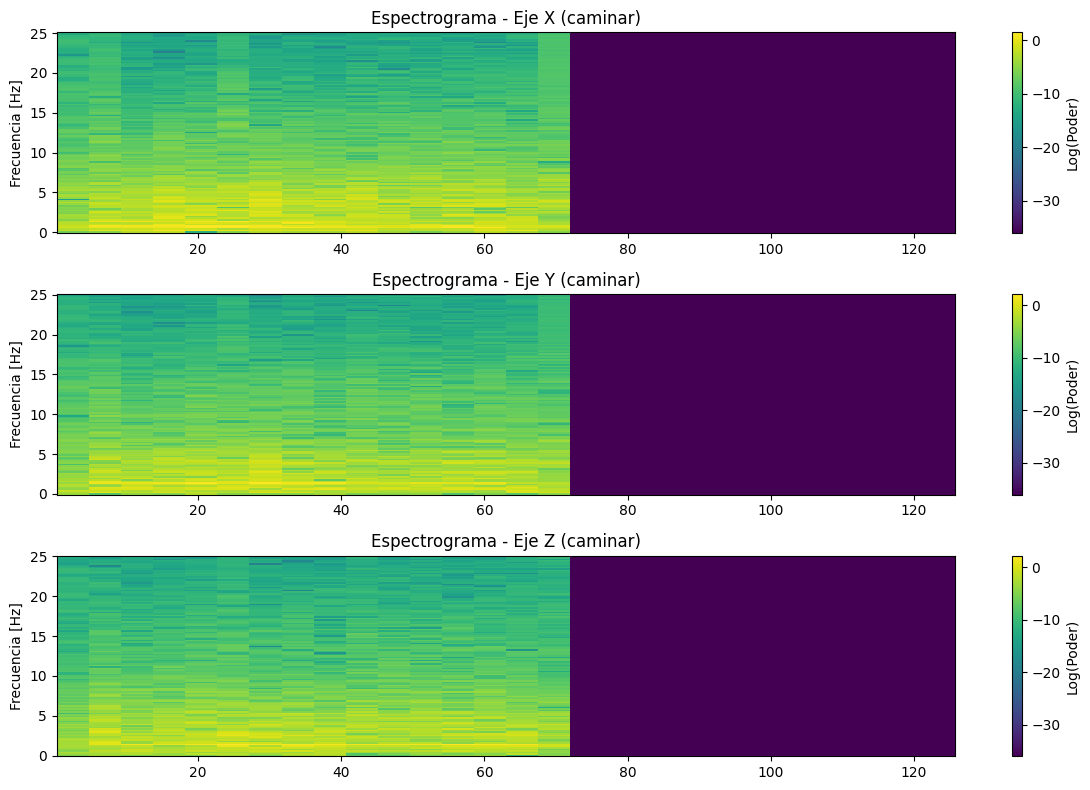

In [12]:
# Selecciona una muestra aleatoria (o de un archivo específico)
activity_sample = data_normalized[1]  # Ejemplo, puedes elegir otra muestra

# Generar el espectrograma para la muestra
f, t, Sxx, Syy, Szz = generate_spectrogram(activity_sample)

# Mostrar el espectrograma para la actividad "caminar"
plot_spectrogram(f, t, Sxx, Syy, Szz, 'caminar')


Se validan las etiquetas de las categorias.

In [13]:
# se verifica las etiquetas de cada actividad
activity_labels = [item['label'] if isinstance(item, dict) else item for item in activity_labels]

print(activity_labels)

['correr', 'caminar', 'sentado', 'subir_gradas', 'bajar_gradas']


In [14]:
print(len(data_normalized))
print(len(activity_labels))

print(f"Cantidad de muestras en datos: {len(data_normalized)}")
print(f"Cantidad de etiquetas: {len(activity_labels)}")



60
5
Cantidad de muestras en datos: 60
Cantidad de etiquetas: 5


In [15]:

num_samples_per_activity = len(data_normalized) // 5

# Crear etiquetas repetidas para cada actividad
activity_labels = (
    ['correr'] * num_samples_per_activity +
    ['caminar'] * num_samples_per_activity +
    ['sentado'] * num_samples_per_activity +
    ['subir_gradas'] * num_samples_per_activity +
    ['bajar_gradas'] * num_samples_per_activity
)



In [16]:
print(len(data_normalized), len(activity_labels))


60 60


# 2.  MODELOS DE DEEP LEARNING

- MLP : Red completamente conectada.

- CNN 1D: Red convolucional

- RNN: Red recurrente



Se utiliza el diccionario " activity_labels" definido al inicio para convertir etiquetas categoricas en valores númericos.

    activity_labels = {
    'correr': 0,
    'caminar': 1,
    'sentado': 2,
    'subir_gradas': 3,
    'bajar_gradas': 4
    }

## Division los datos en conjuntos de entrenamiento y preuba.

- Se especifica que el 20% de los datos se reserva para el conjunto de prueba.

- Se establece una semilla aleatoria de 42 para garantizar que la división se
 reproducible.

##   Division del conjunto de entrenamiento para validación.

- Se realiza la división del conjunto de entrenamiento para crear el conjunto de validacion donde se especifica que el 20% del conjunto de entrenamiento se utiliza para la validacion.



In [17]:
# Convertir etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
activity_labels_encoded = label_encoder.fit_transform(activity_labels)
activity_labels_categorical = to_categorical(activity_labels_encoded)

# Dividir en entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(data_normalized, activity_labels_categorical, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)  # 20% del total para validación

# Forma de los datos
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
n_classes = y_train.shape[1]

# CREACIÓN DE LOS MODELOS.

- Se crean funciones para cada uno de los modelos

In [18]:


### Modelo 1: MLP ###
def crear_mlp_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(n_timesteps, n_features)),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



## MODELO 1 MLP.

1. Componente del modelo.

   - Modelo secuencial donde las capa se apilan una tras otra.
   - Capa de aplanamiento: Esta capa convierte la entrada en un formato unidimencional (Un Vector) ya que las capas siguientes esperan los datos en dicha forma.
   - Se cargan 2 capas densas totalmente conectadas con 100 neuronas cada una.
   - Una capa de salida donde n_clases representa el numero neuronas por cada clase a clasificar. Tiene una funsion de activación Sofmax esencial para resolver problemas de clasificacion
   - Se compila el modelo con los siguientes parametros:
       - Optimizador: adam
       - Funsion de perdida: categorical_crossentropy
       - Metrica: accuracy

2. Ventajas del modelo.

   - El modelo es facil de entender y construir.
   - Es de facil adaptación a diferentes problemas ajustando el numero de capas o neuronas
   - El usu del optimizador Adam permite que el modelo converja rapidamente en el entrenamiento
   - Las capas densas permiten al modelo aprender patrones complejos.

3. Desventajas del modelo.

   - Por tener multiples capas densas el modelo puede llegar a un sobreajuste.
   - Requiere normalizacipon o estandarizacion de los datos de entrada para aseguras que las caracteristicas esten en escalas comparables
   - Dependiendo del tamaño de los datos y la arquitectura del modelo puede requerir gran cantidad de recurso computacional.

In [30]:
### Modelo 2: CNN 1D ###
def crear_cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)),
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



## MODELO 2 CNN 1D

1. Componentes del modelo.

     - Igual que el modelo anterior este mdelo se construye de manera secuancial apilando capas una tras otra.
     - Tiene una capa convolucional unidimencional
         - Entrada con 64 filtros o nucleos lo que significa que aprenderá 64 caracteristicas diferentes a partir de la entrada.
         - El tamaño del filtro es de 3 lo que significa que cada filtro vera 3 pasos temporales a la vez
         - Una funsion de activación relu
         - Un imput que define la forma de los datos de entrada.
     - La segunda capa convolucional con las mismas configuraciones que la primera, esto permite al modelo aprender caracteristicas mas complejas a partir de las caracteristicas extraidas en la primera
     - Capa de Max Pooling, esta caracteristica reduce la dimencionalidad de las caracteristicas extraidas por las capas convolucionales tomando el valor maximo de cada ventana.
     - Capa de aplanamiento, convierte la salida multidimencional de las capas anteriores en un vector unidimencional necesaria para pasarla a las capas densas
     - Capas densas, una capa densa con 100 neuronas y con una funcion de activación relu que permite al modelo aprender representaciones no lineales complejas.
     -Capa de salida, donde n_classes representa el numero de neuronas una por cada clase.
     - El modelo se compila con la siguiente configuración:
          -  Optimizador: adam
          -  Funsion de perdida: categorical_crossentropy
          -  Metrica: accuracy.

2. Ventajas del modelo

    - Las capas convolucionales son efectivas para  detectar patrones locales en los datos secuenciales, lo que puede ser crucial para tareas de clasificacion o deteccion de anomalias
    - Facil Adaptabilidad a diferentes tipos de datos secuenciales como las señales del acelerometro

3. Desventajas

    - Si la cantidad de datos es limitada el modelo puede sobreajustarse a los datos de entrenamiento
    - Es mucho mas eficiente que el anterior modelo pero requiere mas tiempo de entrenamiento y recurso computacional


In [60]:
### Modelo 3: RNN (LSTM) ###
def crear_rnn_model():
      model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(100, input_shape=(n_timesteps, n_features)),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(n_classes, activation='softmax')
      ])
      model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
      return model

      '''
      model = tf.keras.models.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape=(n_timesteps, n_features))),
        tf.keras.layers.LSTM(50, dropout=0.2, recurrent_dropout=0.2),
        tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(n_classes, activation='softmax')
      ])
      model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
      return model
      '''


## MODELO  RED NEURONA RECURRENTE RNN

1. Componente del Modelo

      - Este modelo esta basado en LSTM (long Short-Term Memory) es ideal para para procesar datos secuenciales o dependientes de tiempo
      - Compuesto con una capa LSTM con 100 unidadespara capturar relaciones temporales en las series de datos. Aprente a retener informacion relevante de cada uno de los pasos anteriores.
      - Capa densa con 100 neuronas totalmente conectadas con una funsion de activacion ReLu para modelar relaciones no lineales.
      - Capa de salida donde n_clases corresponde al numero de las actividades humanas a clasificar, con una funsiones de activación softmax.
      - Compilación del modelo:
          
          - Optimizador: Adam Ajusta el aprendizaje de manere dinamica
          - Funsion de Perdida: Categorical Crosentropy Para problemas de clasificacion multiclase
          - Metrica Accuracy

2. Ventajas del Modelo

      - Captura dependencias temporales capturando patrones den datos secuenciales
      - Puede manejar series temporales de diferenres longitudes mediante Padding
      - Es ideal para tareas como deteccion de actividades, reconocimiento de voz.

3. Desventajas del Modelo.

      - Requiere altos recursos computacionales
      - rendimiento limitado con secuencias muy largas
      - Se corre el riesgo que tengan un sobreajuste a los datos de entrenamiento
      - mayor complejidad




## ENTRENAMIENTO DE LOS MODELOS

Se crea una funcion con el fin de entrenar y evaluar los modelos anteriormente creados

In [62]:
### Entrenamiento de Modelos ###
def entrenar_evaluar(model, model_name):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} Test Accuracy: {accuracy:.2f}")
    return history

##3.  ENTRENAMIENTO Y EVALUACIÓN DE MODELOS

- Se hace le llamado a las funciones de crear y entrenar los modelos de aprendizaje profundo.

In [63]:
# Crear y entrenar modelos
mlp_model = crear_mlp_model()
cnn_model = crear_cnn_model()
rnn_model = crear_rnn_model()

print("Entrenando MLP...")
history_mlp = entrenar_evaluar(mlp_model, "MLP")

print("Entrenando CNN 1D...")
history_cnn = entrenar_evaluar(cnn_model, "CNN 1D")

print("Entrenando RNN...")
history_rnn = entrenar_evaluar(rnn_model, "RNN")

Entrenando MLP...
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.2379 - loss: 1.8512 - val_accuracy: 0.8000 - val_loss: 0.6578
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9441 - loss: 0.1466 - val_accuracy: 0.8000 - val_loss: 0.7419
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8000 - val_loss: 0.8797
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 4.4467e-04 - val_accuracy: 0.8000 - val_loss: 1.0081
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 1.2562e-04 - val_accuracy: 0.8000 - val_loss: 1.1094
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 5.3624e-05 - val_accuracy: 0.8000 - val_loss: 1.1883
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 2.4096e-05 - val_accuracy: 0.8000 - val_loss: 1.2553
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.1405e-05 - v

## RESULTADOS DEL ENTRENAMIENTO.

- Para el modelo MLP durante el entrenamiento sobre los datos de prueba tiene un Accuracy: 0.75 lo que significa que tiene una precision del 75% en las predicciones en comparacion con las etiquetas reales.

- Para el modelo CNN 1D durante el entrenamiento sobre los datos de prueba tiene un Accuracy: 0.83 lo que significa que tiene una precision del 83% en las prediccines en comparacion con las etiquetas reales.

- Para el modelo RNN durante el entrenamiento sobre los datos de prueba tiene un Accuracy: 0.33 o que significa que tiene una precision del 33% en las predicciones en comparacion con las etiquetas reales.

En comparación con los 2 modelos anteriores este resultado es significativamente menor lo que se puede apreciar que el modelo no pudo captar adecuadamente las relaciones temporales en los datos.

Una de las posibles causas es la cantidad de datos ya que este modelo (RNN - LSTM) son sencibles a los datos.

Este nivel de precision podria ser suficiente para los modelos MLP y CNN  dependiendo de los requisitos del sistema como es la deteccion de actividades humanas, pero para aplicaciones criticas de la salud se debe contemplar mejorar su rendimiento.



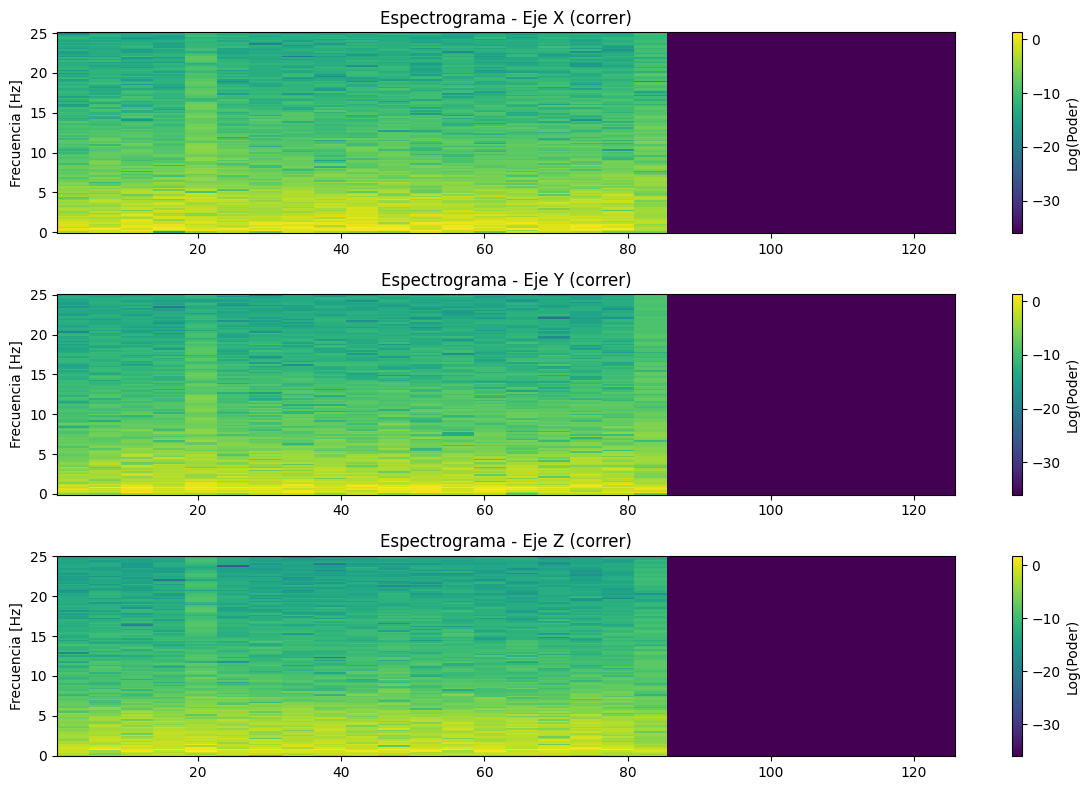

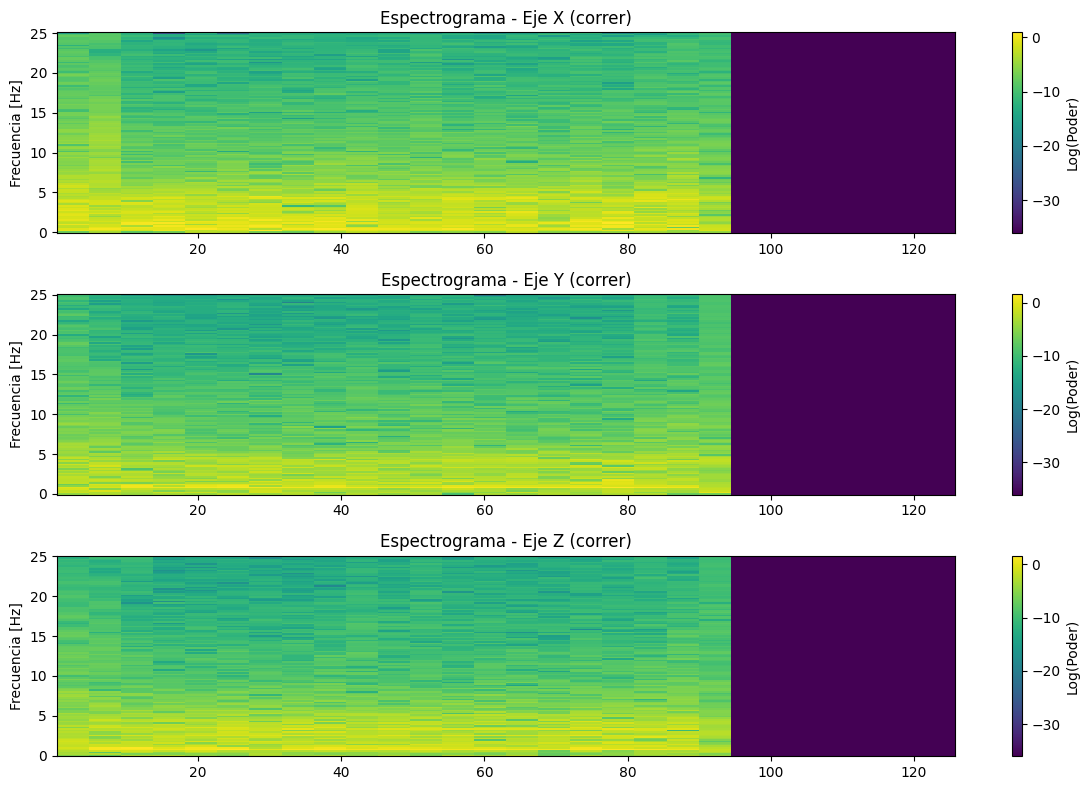

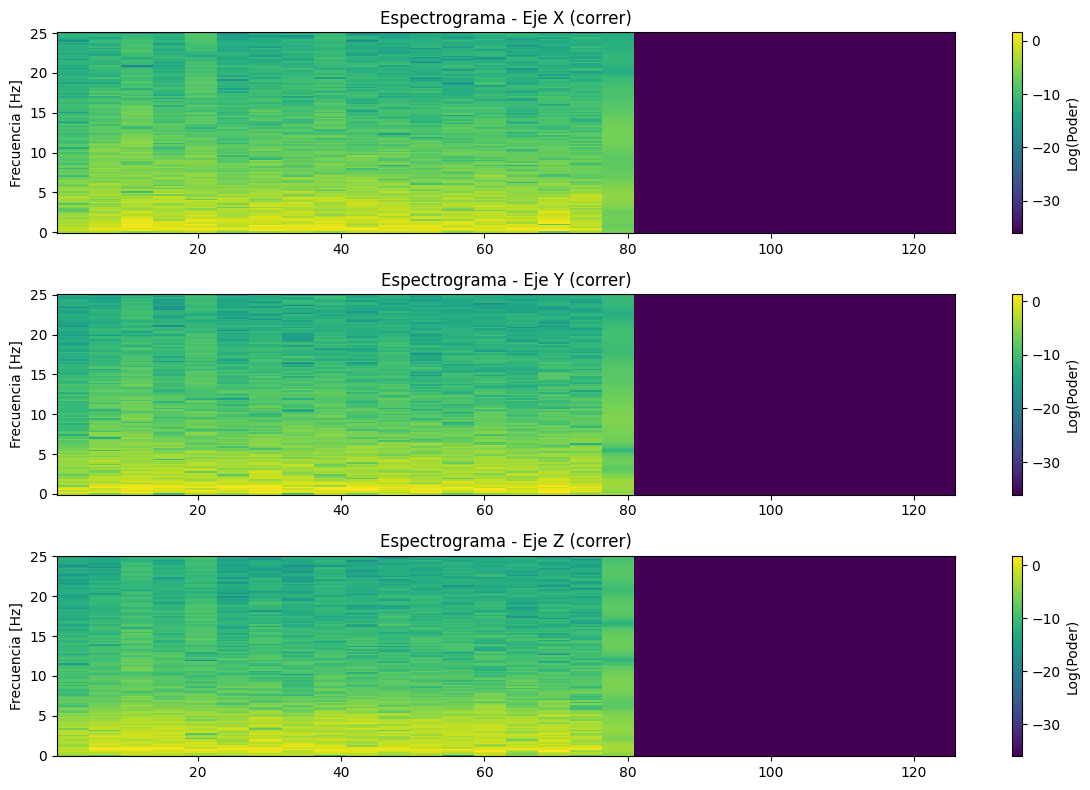

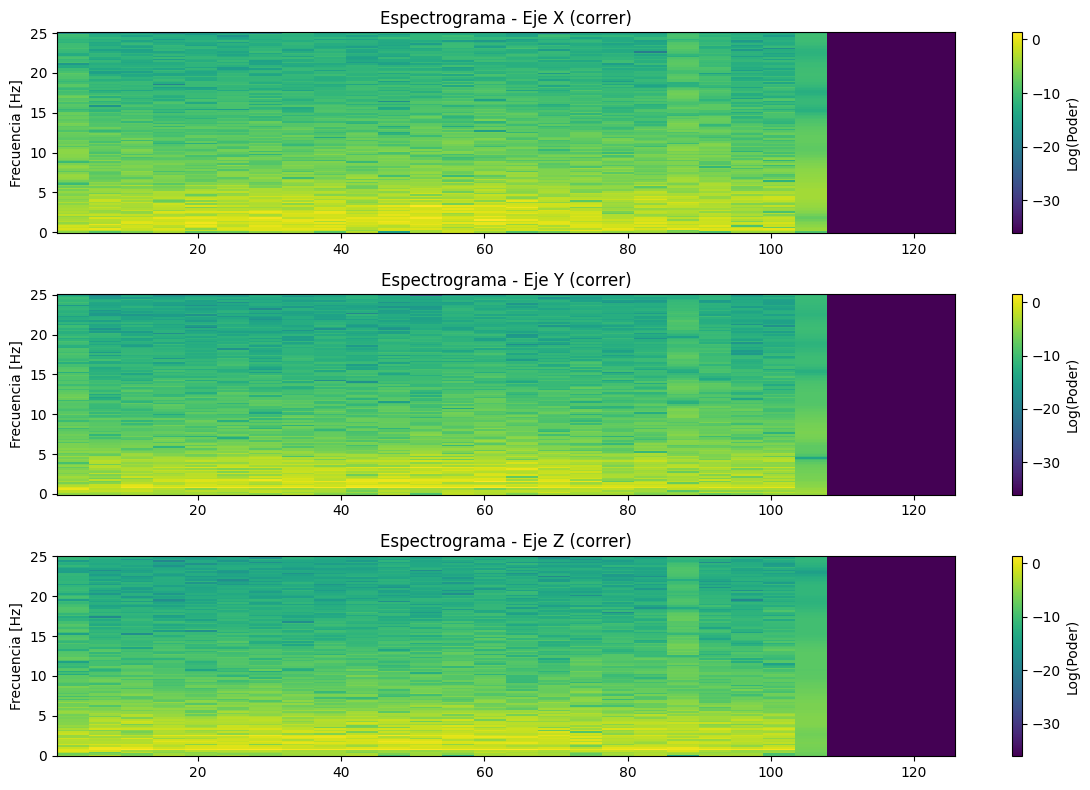

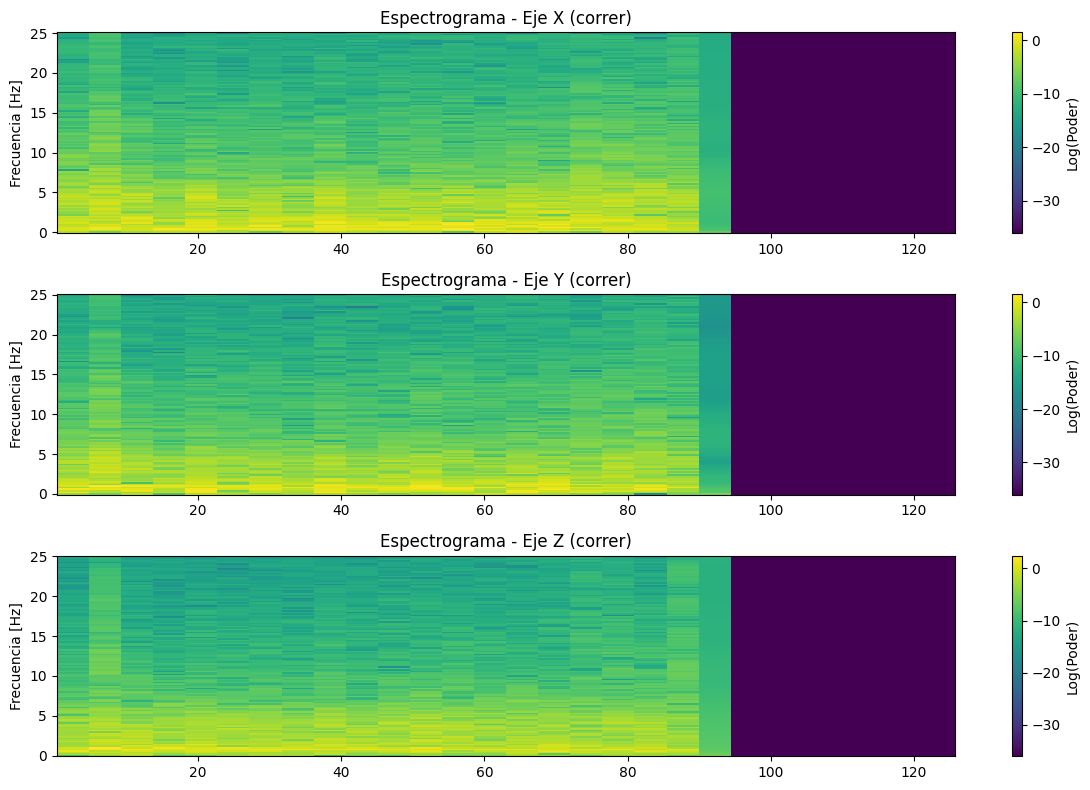

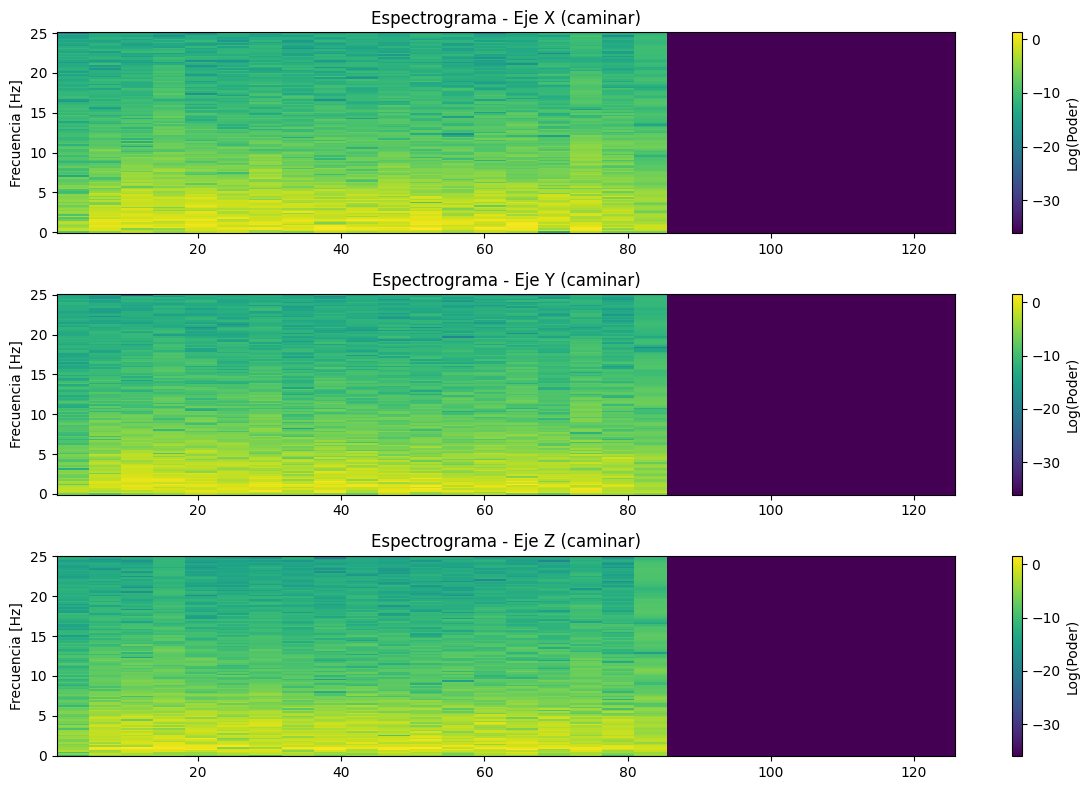

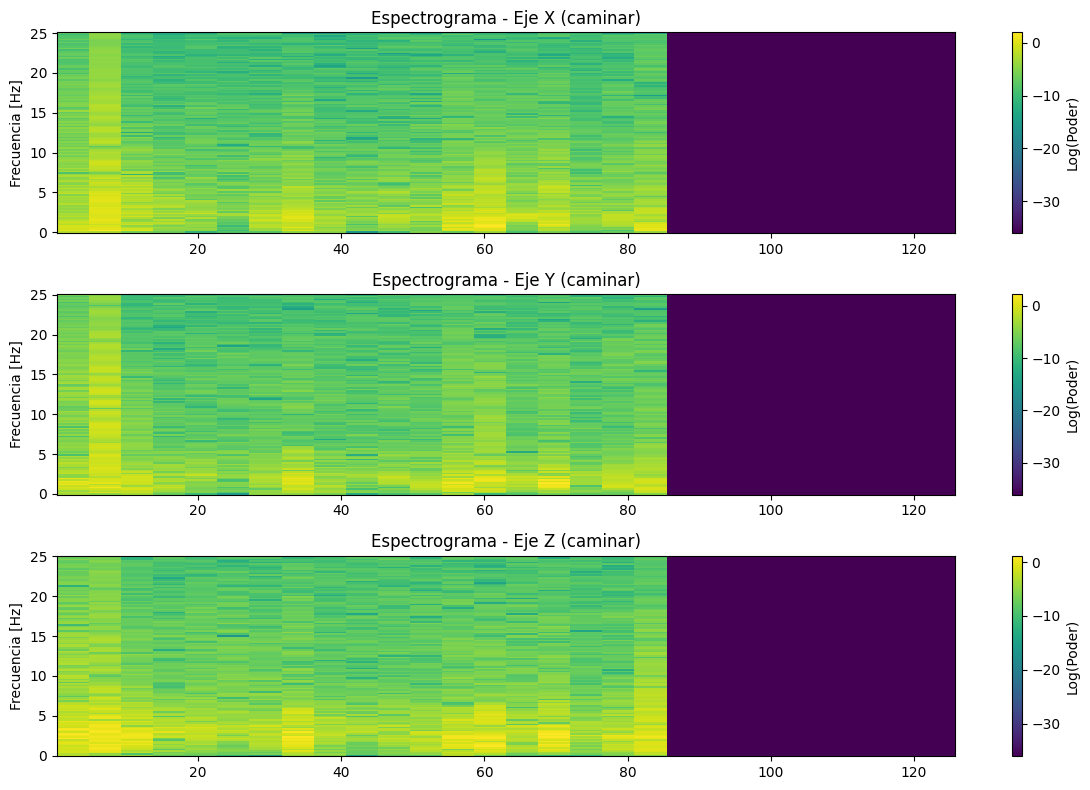

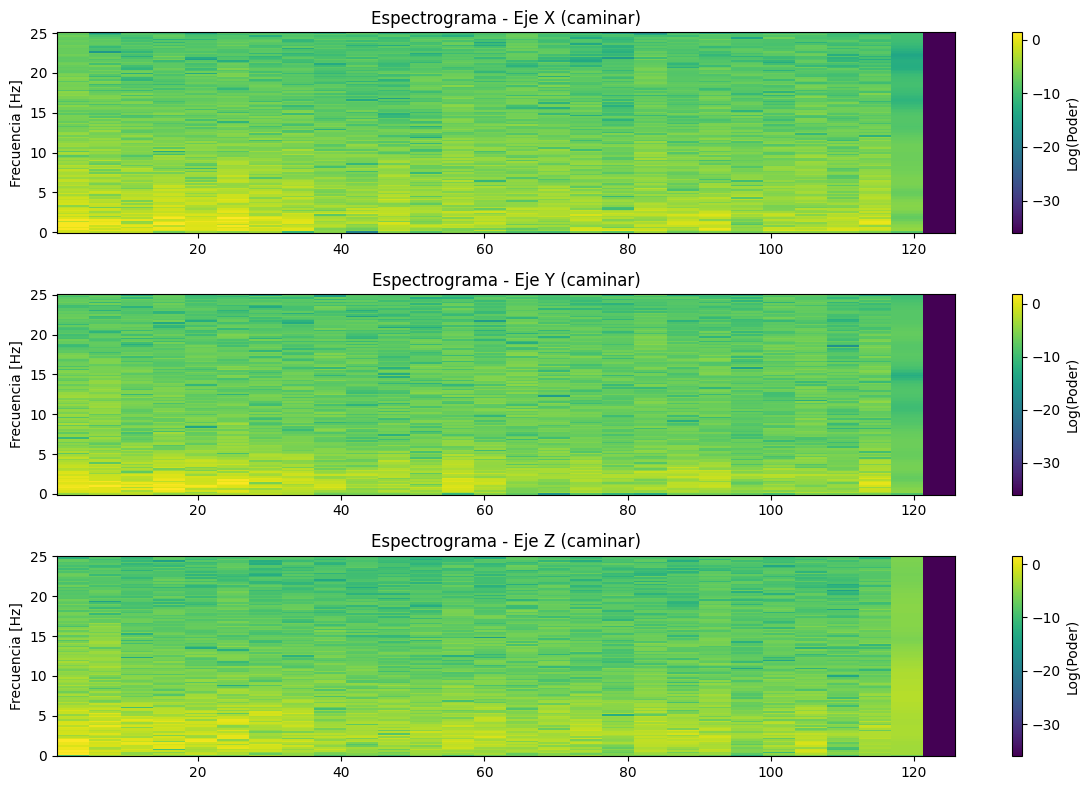

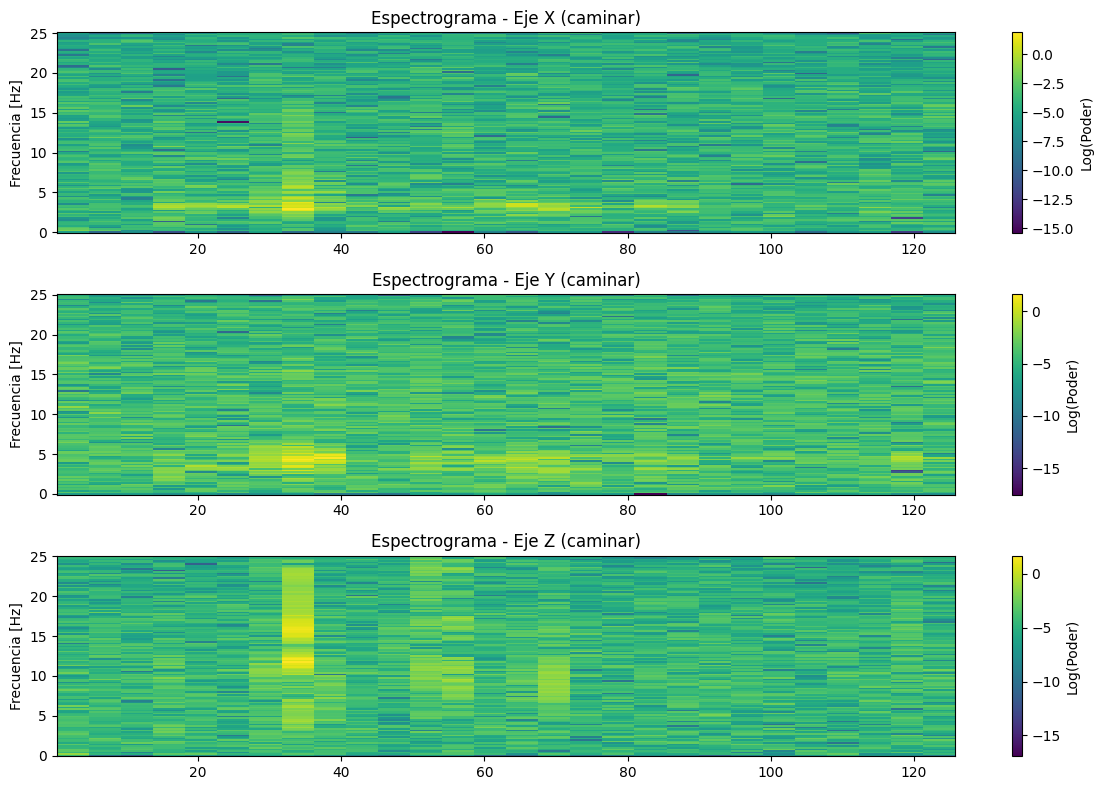

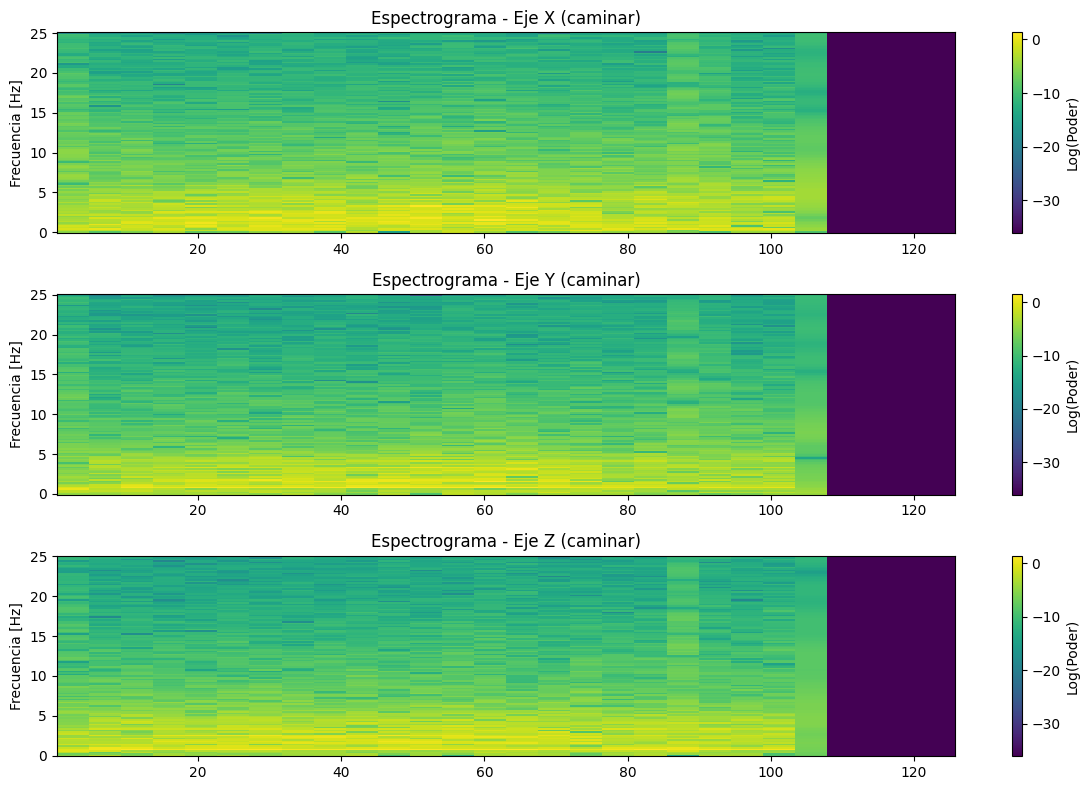

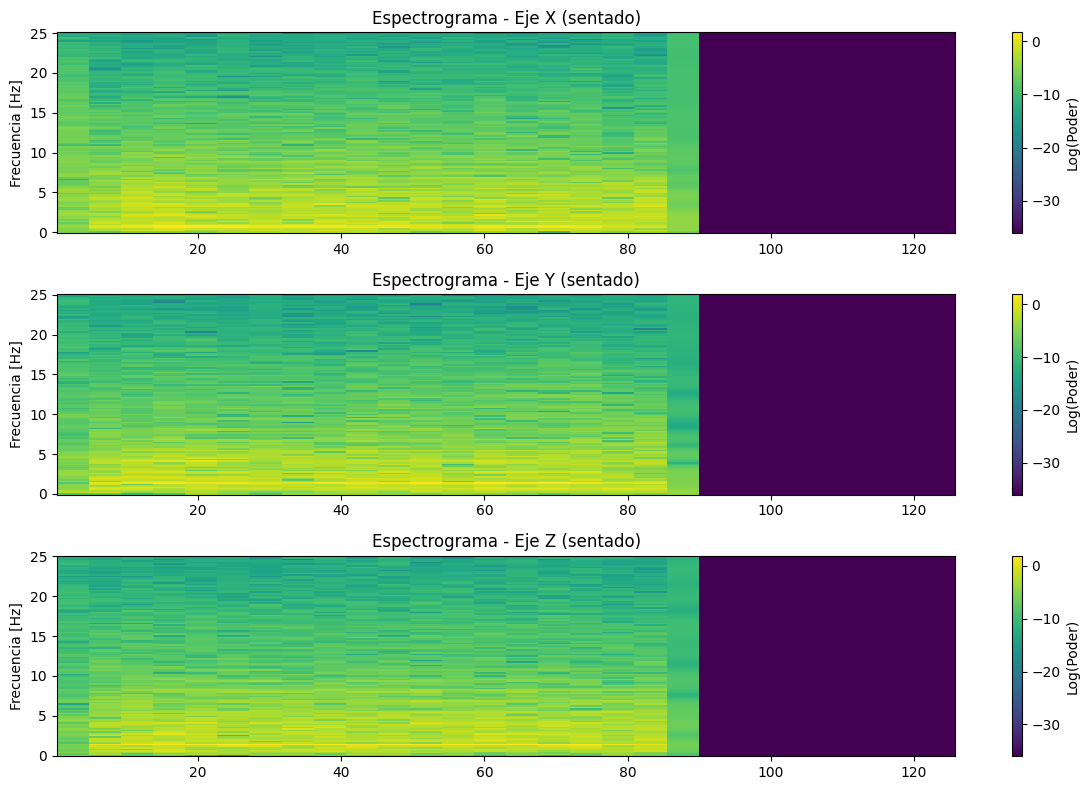

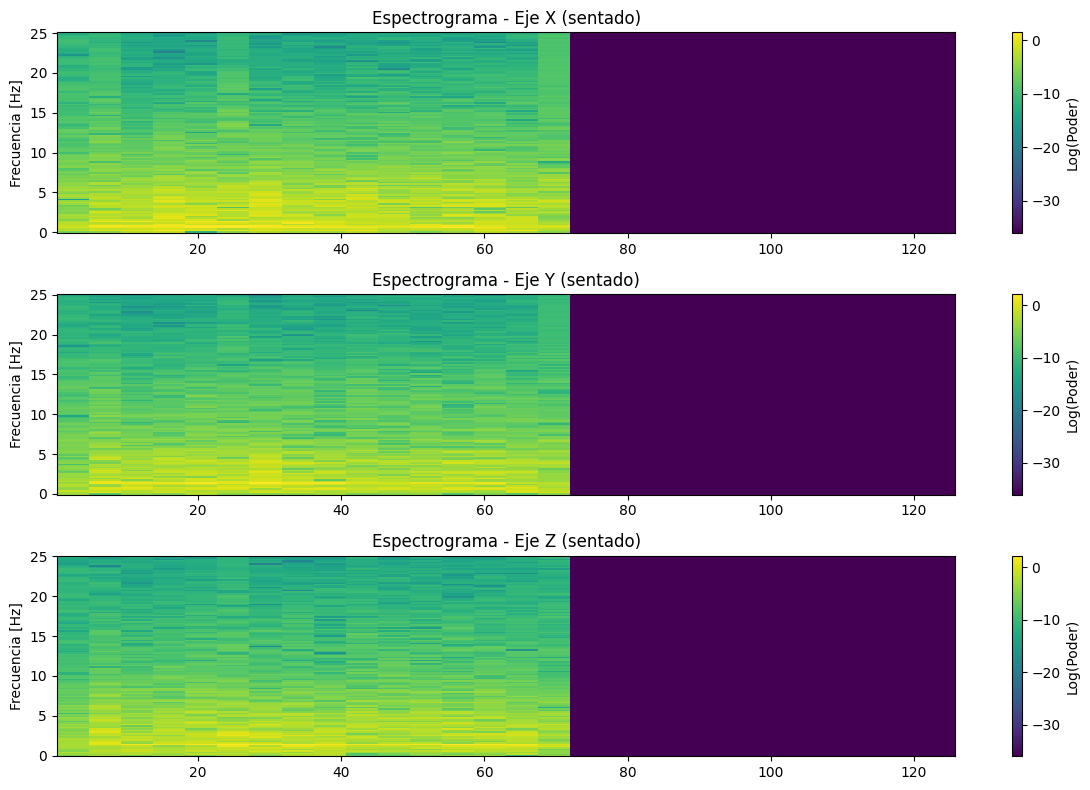

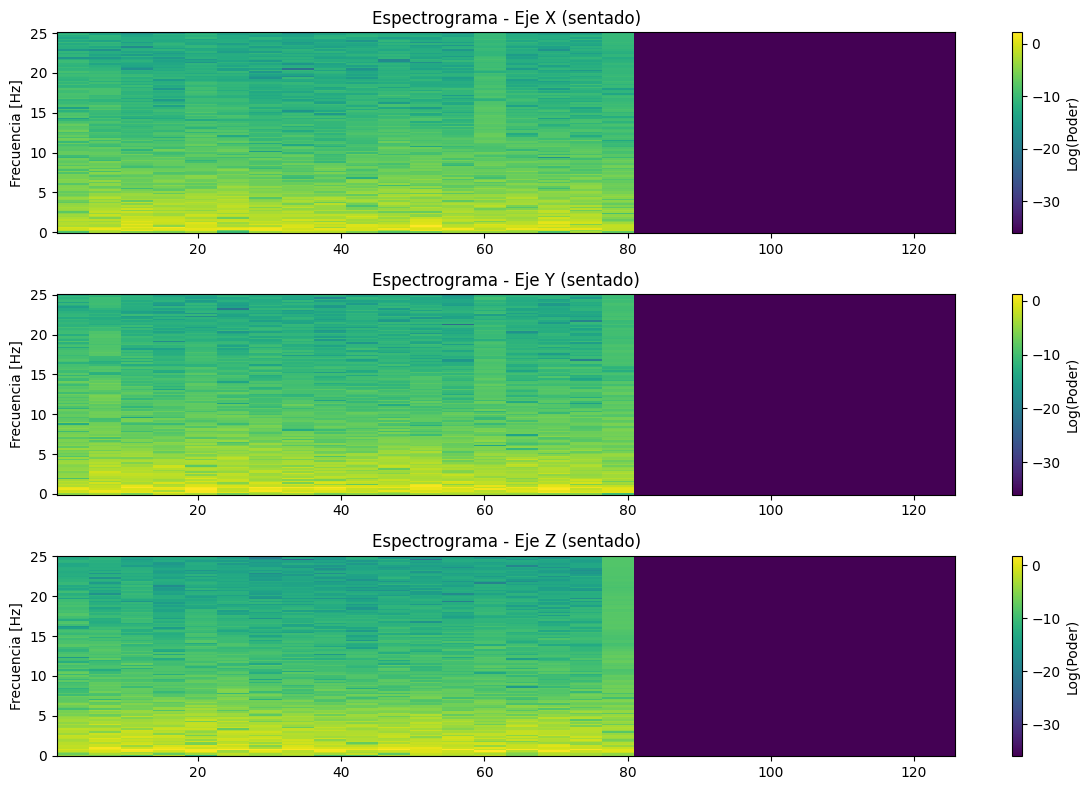

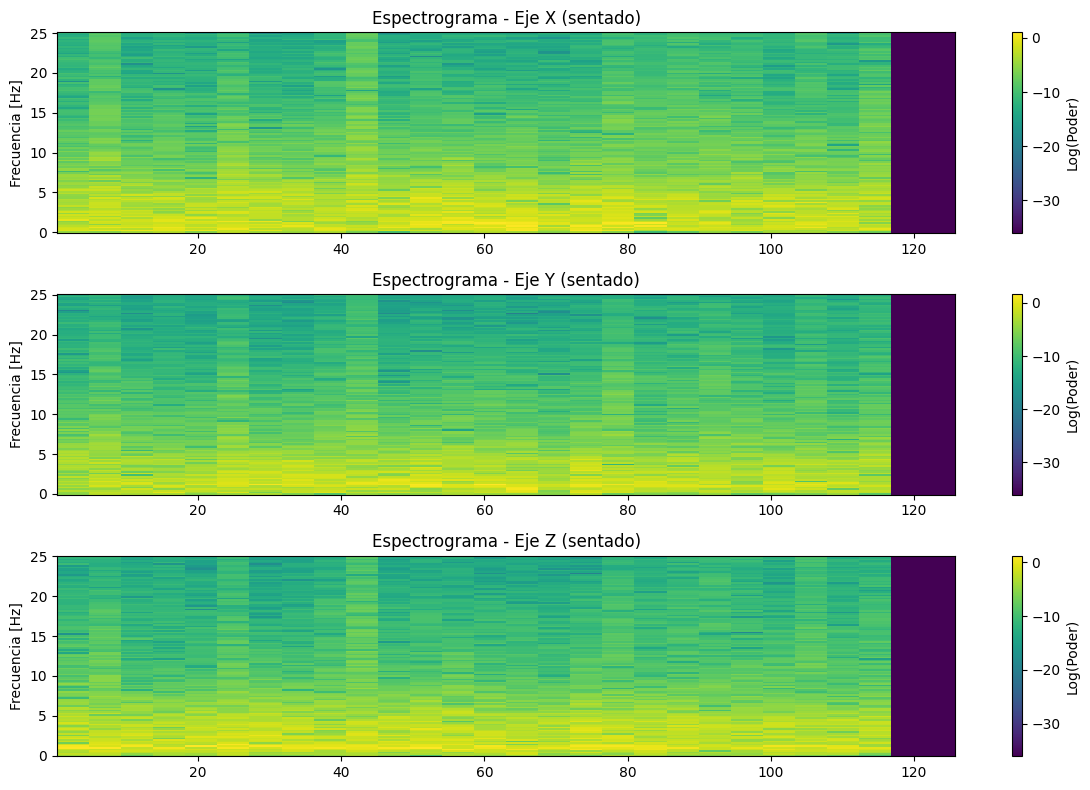

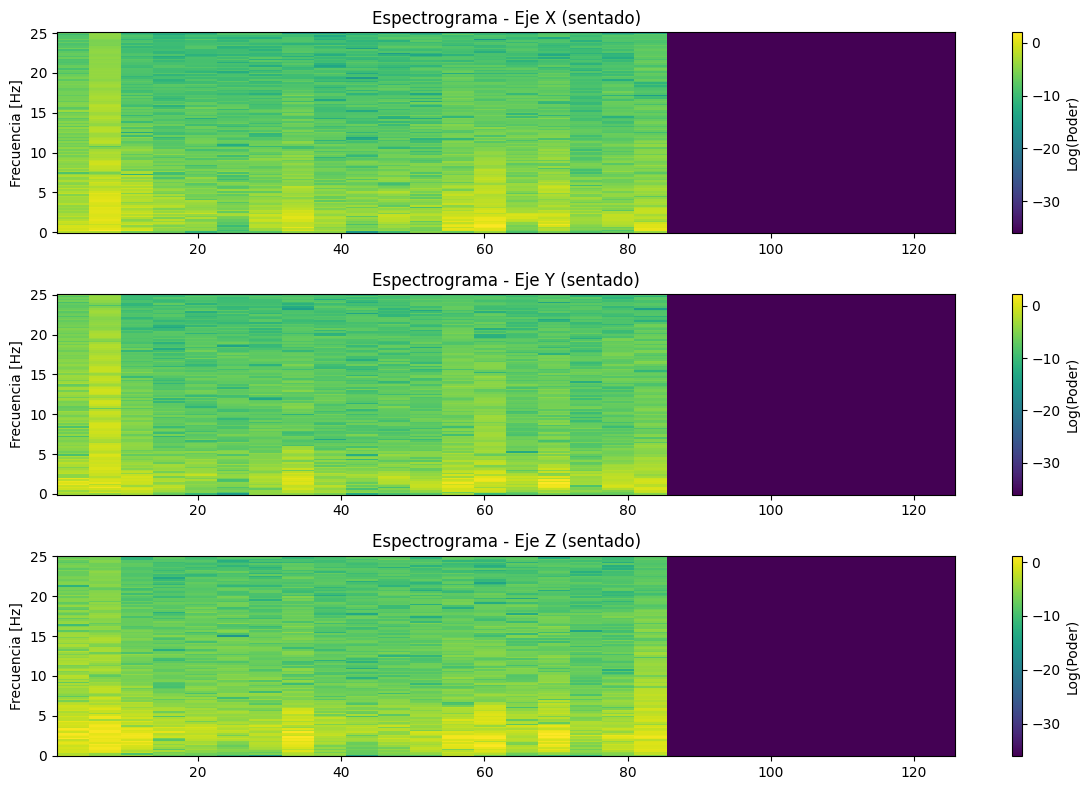

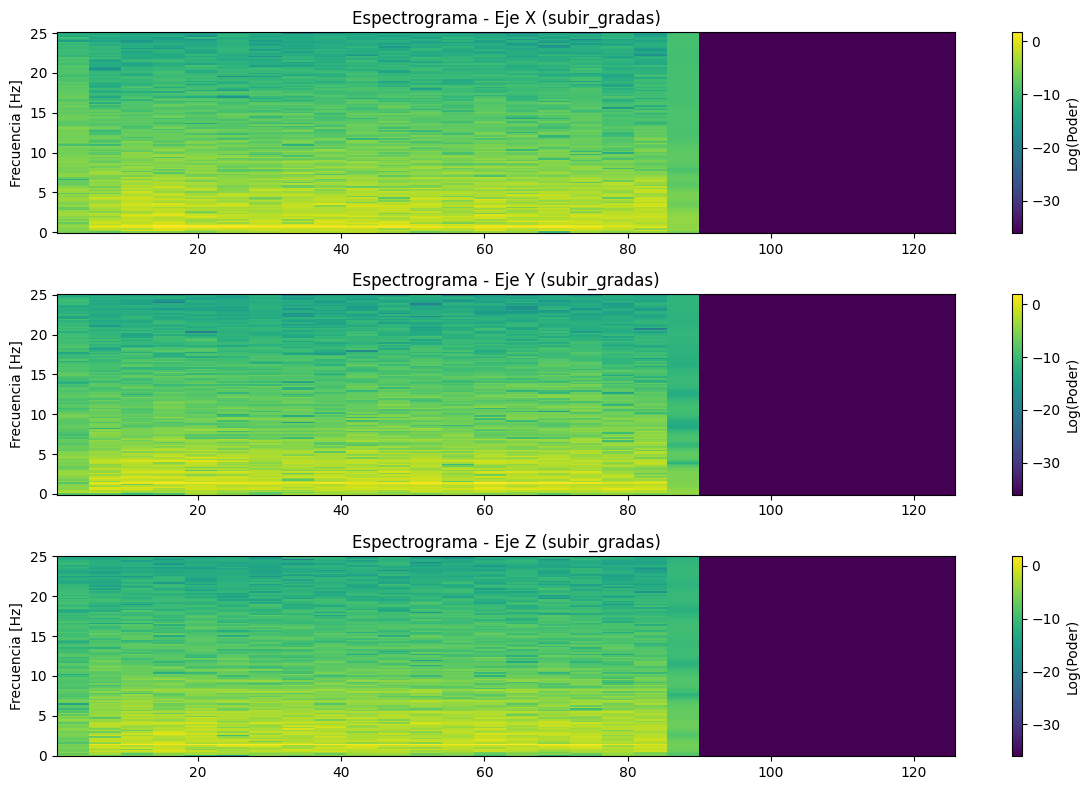

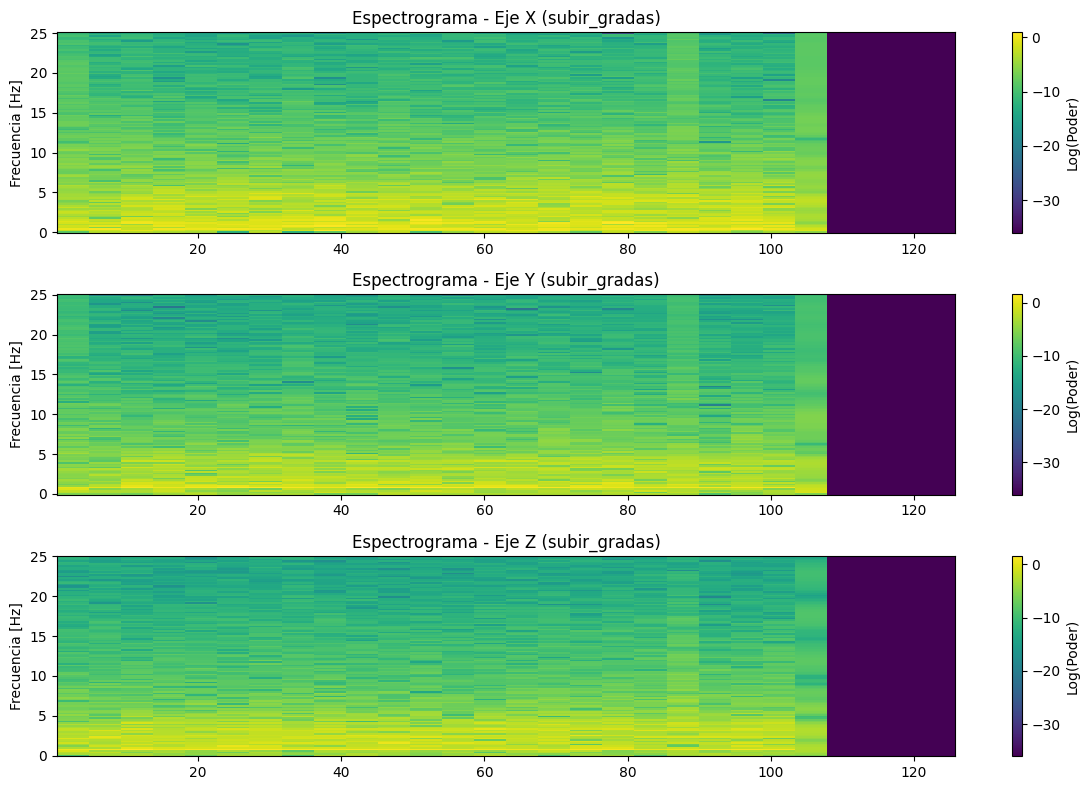

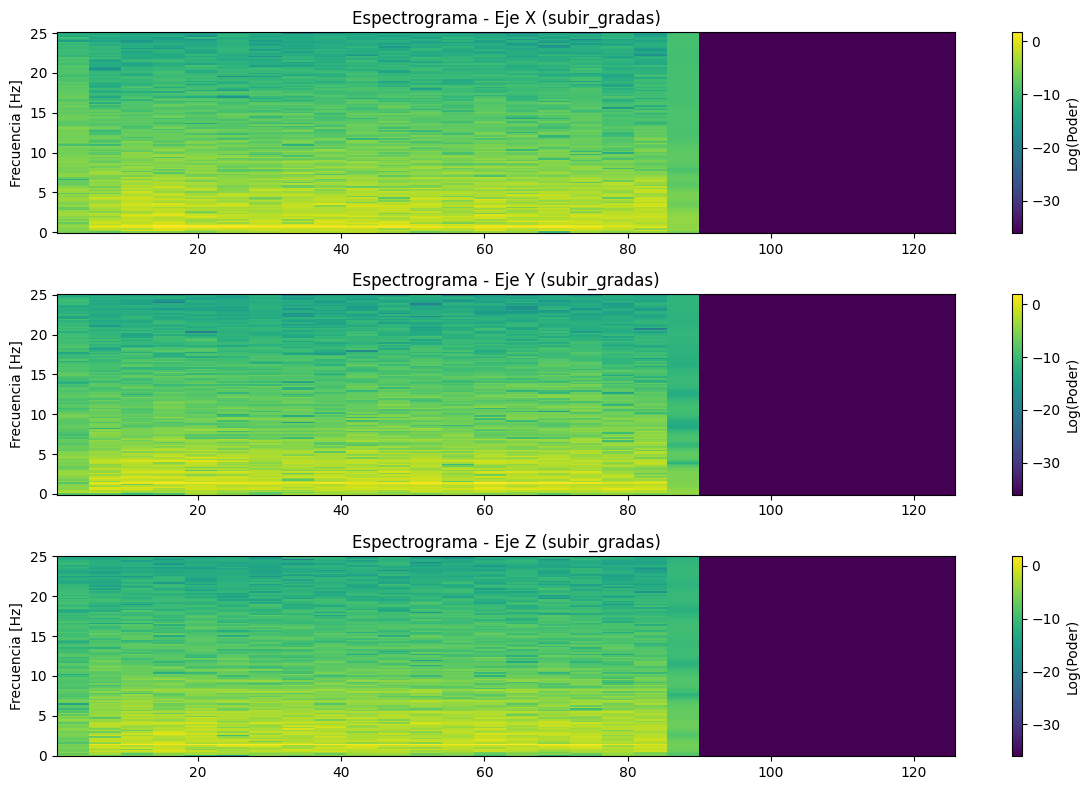

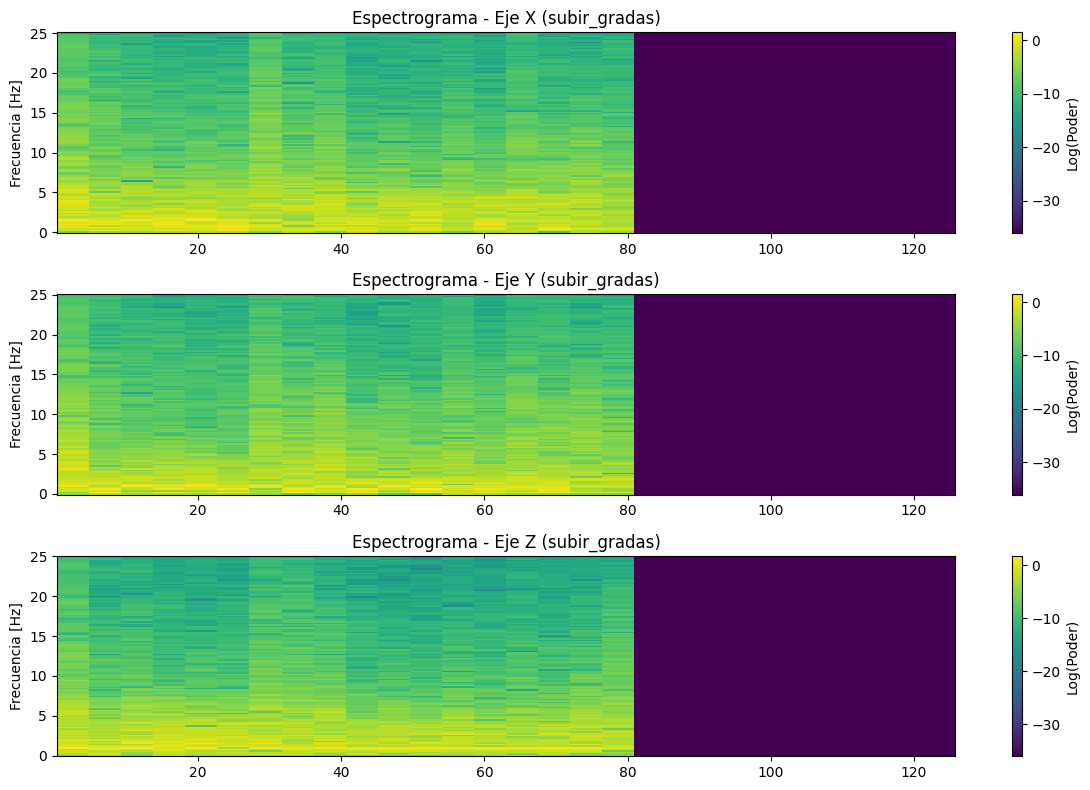

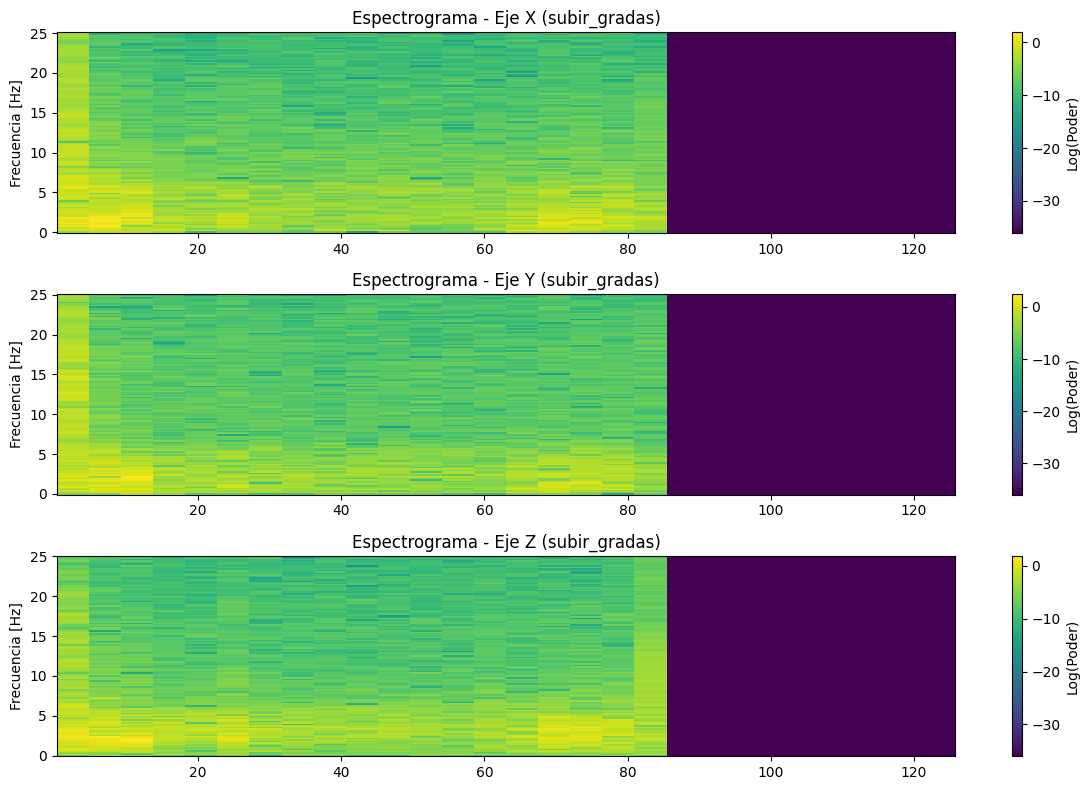

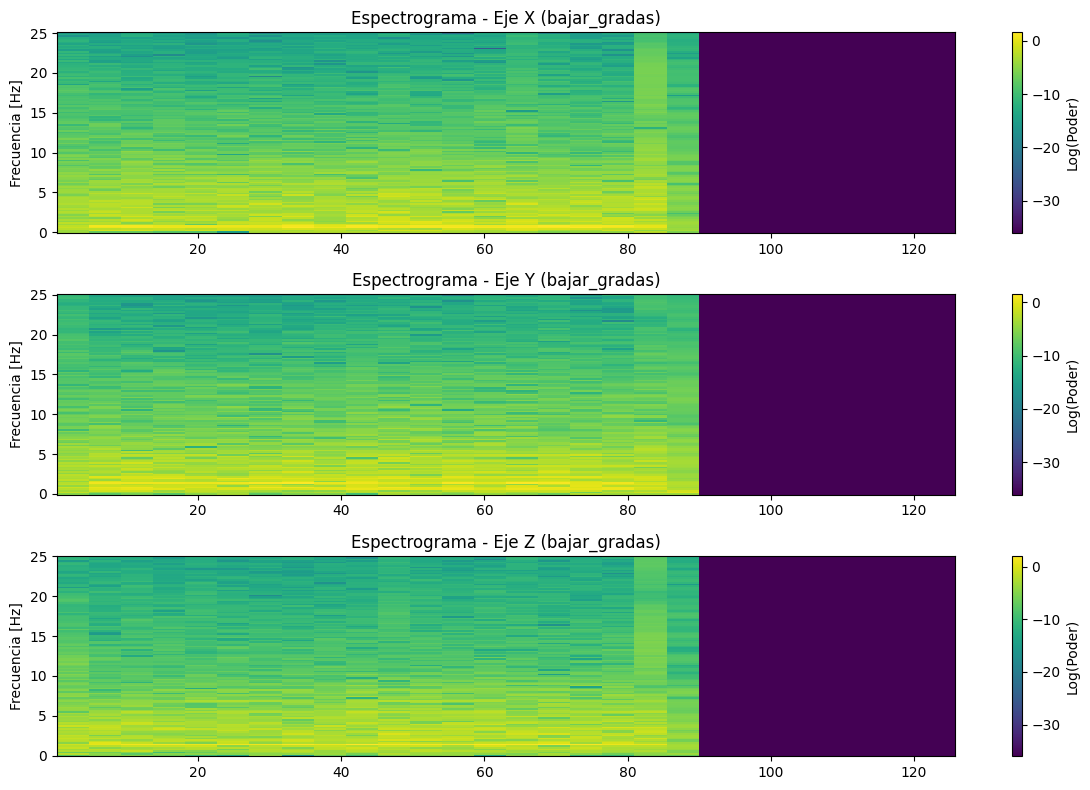

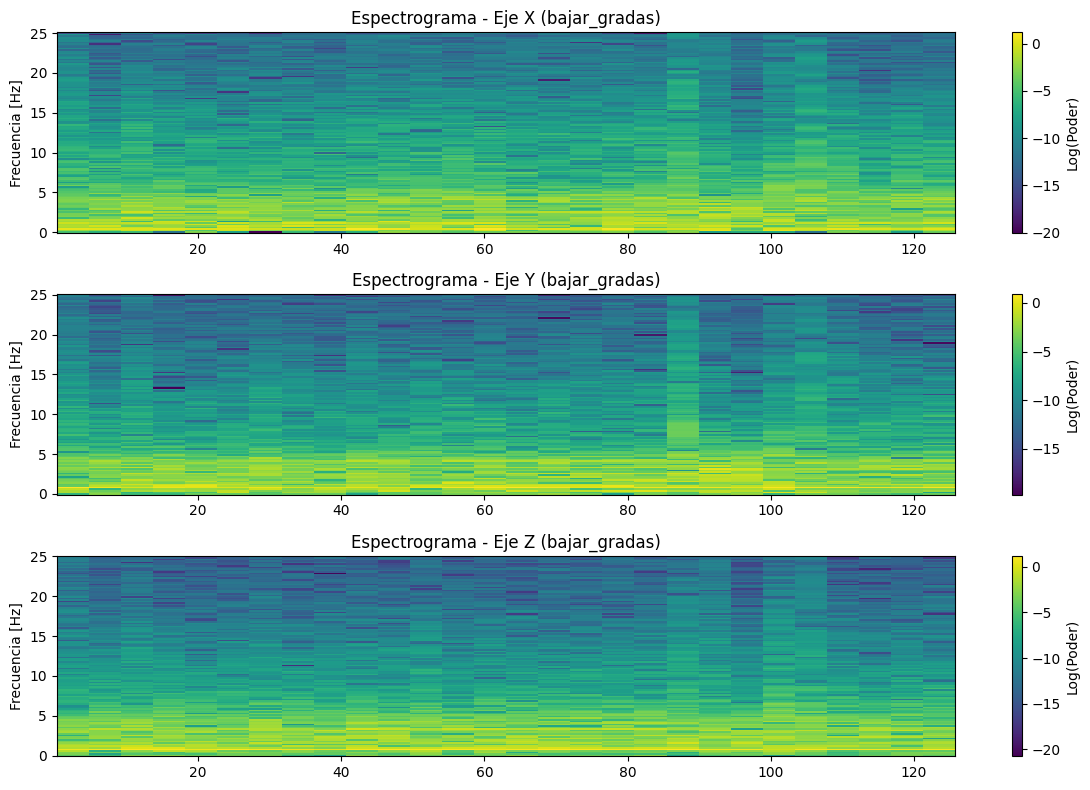

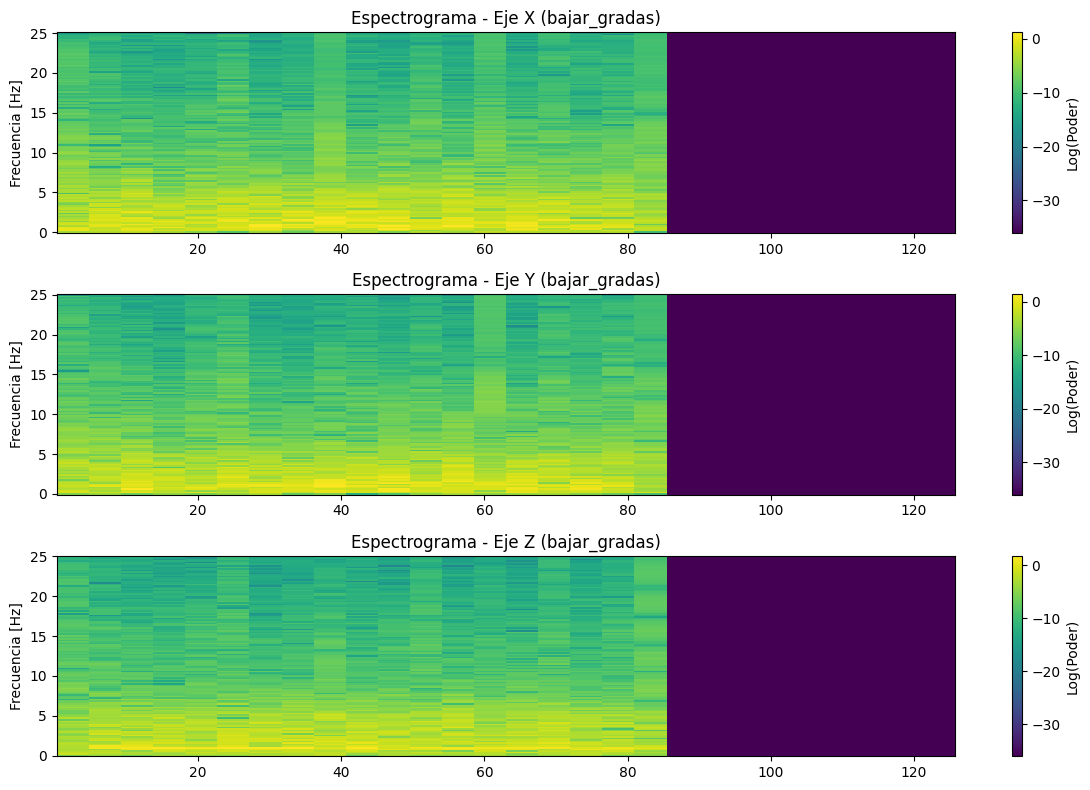

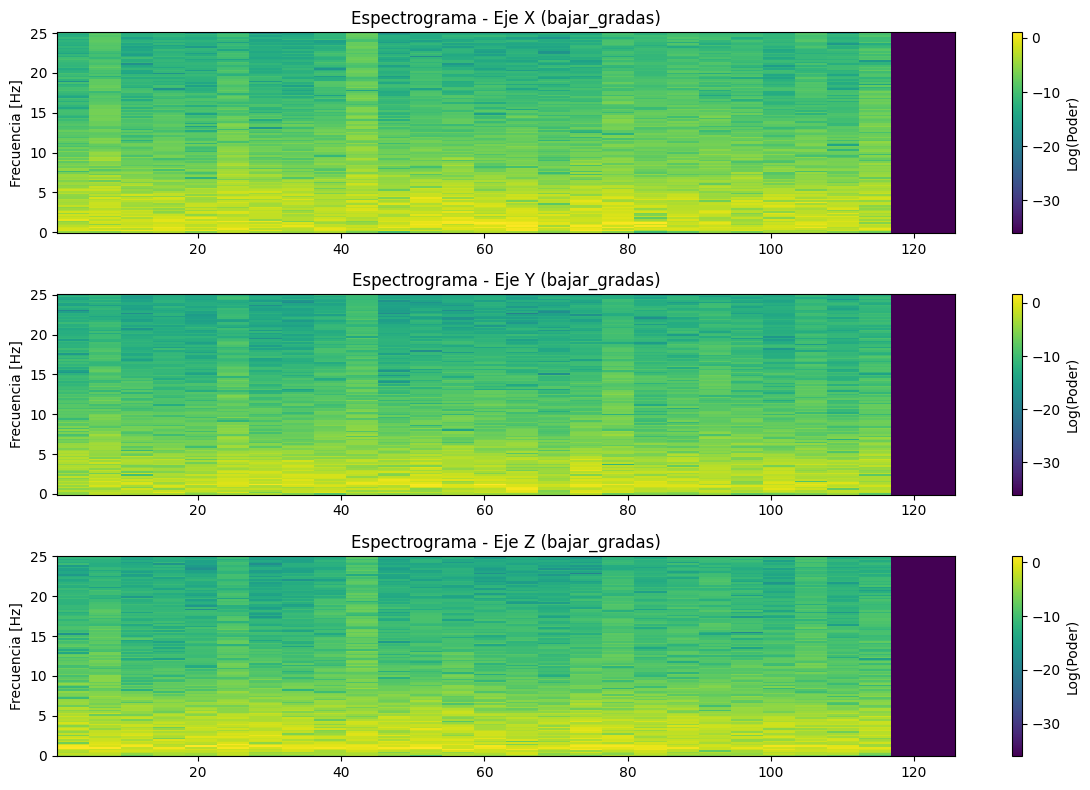

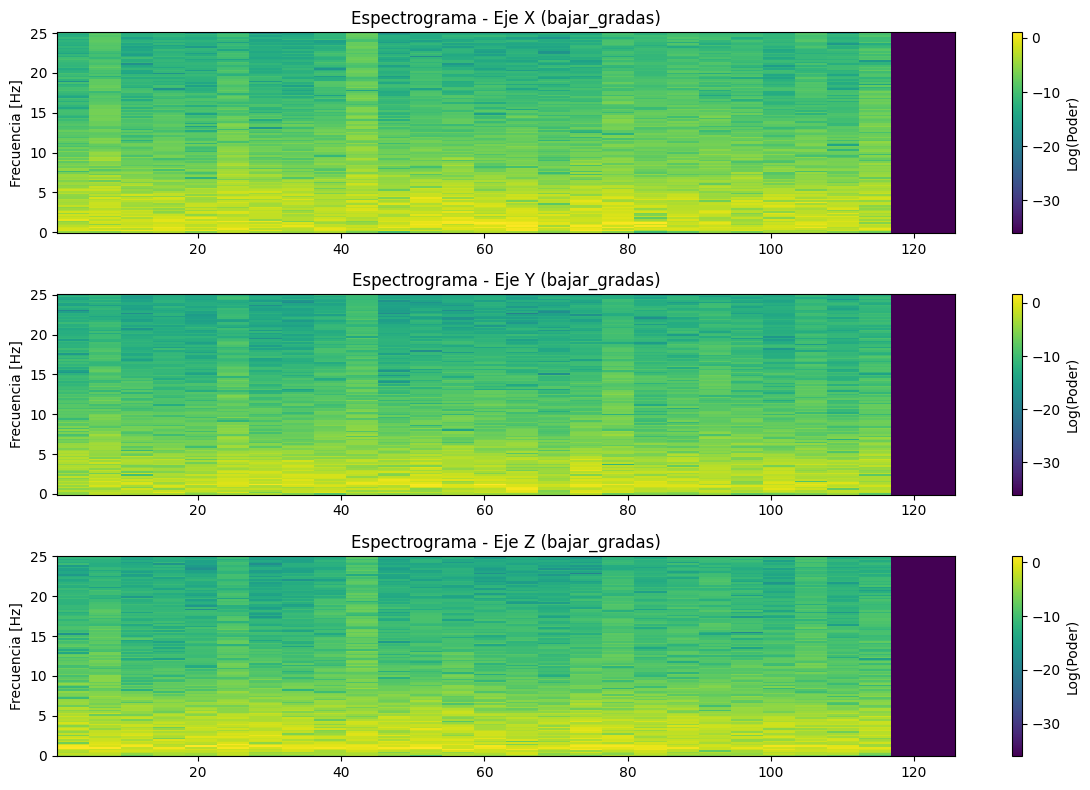

In [64]:
# Función para visualizar espectrogramas clasificados por actividad
def plot_activity_spectrograms(activity_samples, activity_name):
    """
    Muestra los espectrogramas de una actividad específica.
    activity_samples: lista de muestras de datos de una actividad
    activity_name: nombre de la actividad
    """
    for i, activity_sample in enumerate(activity_samples):
        f, t, Sxx, Syy, Szz = generate_spectrogram(activity_sample)  # Genera el espectrograma
        plot_spectrogram(f, t, Sxx, Syy, Szz, activity_name)  # Visualiza el espectrograma

# Definimos las actividades y obtenemos las muestras
activity_samples = {
    'correr': X_train[:5],  # Tomamos las primeras 5 muestras de la actividad correr
    'caminar': X_train[5:10],
    'sentado': X_train[10:15],
    'subir_gradas': X_train[15:20],
    'bajar_gradas': X_train[20:25]
}

# Visualizar espectrogramas de las 5 actividades
for activity_name, samples in activity_samples.items():
    plot_activity_spectrograms(samples, activity_name)


Esta función es útil en análisis de datos donde se desea visualizar cómo cambian las características temporales y frecuenciales de las señales recogidas por sensores durante diferentes actividades físicas ( caminar,correr,sentado, subir y bajar gradas).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Rendimiento del modelo MLP:
  Precisión: 0.75
  Exactitud (Precisión): 0.82
  Recall: 0.75
  F1-Score: 0.76


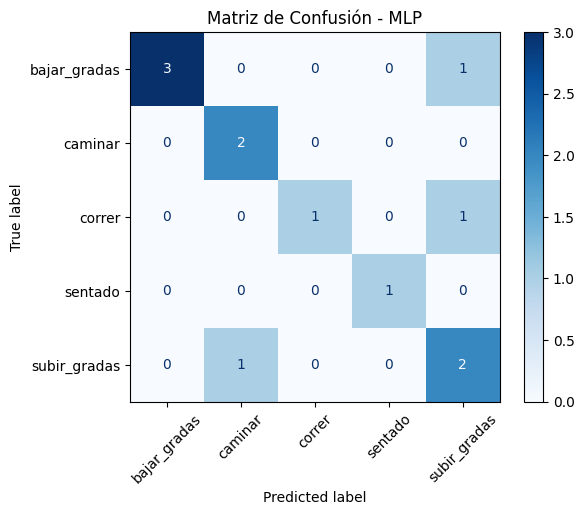

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Rendimiento del modelo CNN 1D:
  Precisión: 0.83
  Exactitud (Precisión): 0.92
  Recall: 0.83
  F1-Score: 0.85


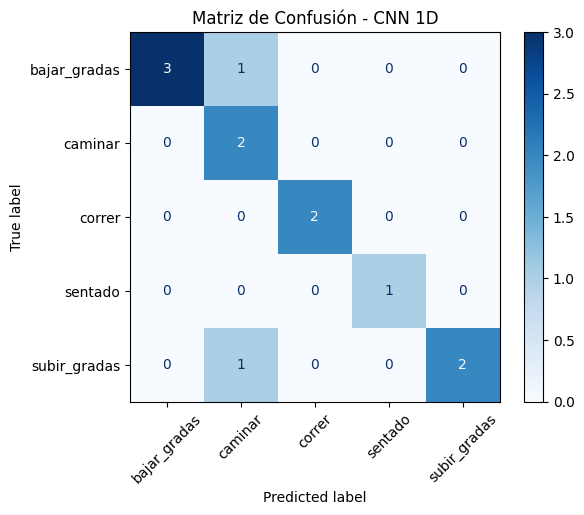

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
Rendimiento del modelo RNN:
  Precisión: 0.33
  Exactitud (Precisión): 0.28
  Recall: 0.33
  F1-Score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


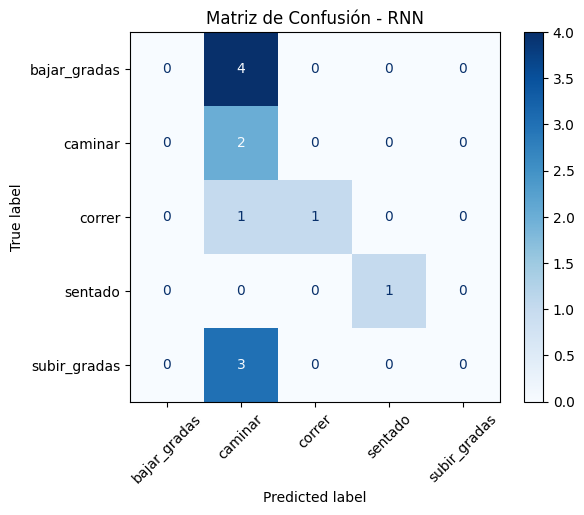

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluacion_modelo(model, X_test, y_test, model_name):
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)

    # Convertir las etiquetas predichas y reales de categorías a etiquetas
    y_test_labels = np.argmax(y_test, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Calcular métricas
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

    # Mostrar métricas
    print(f"Rendimiento del modelo {model_name}:")
    print(f"  Precisión: {accuracy:.2f}")
    print(f"  Exactitud (Precisión): {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-Score: {f1:.2f}")

    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test_labels, y_pred_labels)

    # Asegurarse de que la matriz de confusión tenga las etiquetas correctas
    cmd = ConfusionMatrixDisplay(cm, display_labels=label_encoder.classes_)
    cmd.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {model_name}")

    # Ajuste de los ticks
    plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
    plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
    plt.show()

# Evaluar los tres modelos
evaluacion_modelo(mlp_model, X_test, y_test, "MLP")
evaluacion_modelo(cnn_model, X_test, y_test, "CNN 1D")
evaluacion_modelo(rnn_model, X_test, y_test, "RNN")



In [66]:
# Crear directorio para guardar diagramas de arquitecturas
import os
output_dir = "model_diagrams"
os.makedirs(output_dir, exist_ok=True)

# Función para generar y guardar diagramas
def grabar_model_diagram(model, model_name):
    file_path = os.path.join(output_dir, f"{model_name}_architecture.png")
    plot_model(model, to_file=file_path, show_shapes=True, show_layer_names=True)
    print(f"Diagrama del modelo {model_name} guardado en: {file_path}")

# Modelos
mlp_model = crear_mlp_model()
cnn_model = crear_cnn_model()
rnn_model = crear_rnn_model()

# Guardar diagramas de arquitecturas
grabar_model_diagram(mlp_model, "MLP")
grabar_model_diagram(cnn_model, "CNN_1D")
grabar_model_diagram(rnn_model, "RNN")

# Entrenamiento optimizado
def train_model_with_visualization(model, model_name, epochs=30, batch_size=32):
    print(f"Entrenando {model_name}...")
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=1
    )
    _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_name} - Precisión en prueba: {test_accuracy:.2f}")
    return history

# Entrenar modelos
history_mlp = train_model_with_visualization(mlp_model, "MLP")
history_cnn = train_model_with_visualization(cnn_model, "CNN_1D")
history_rnn = train_model_with_visualization(rnn_model, "RNN")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Diagrama del modelo MLP guardado en: model_diagrams/MLP_architecture.png
Diagrama del modelo CNN_1D guardado en: model_diagrams/CNN_1D_architecture.png
Diagrama del modelo RNN guardado en: model_diagrams/RNN_architecture.png
Entrenando MLP...
Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step - accuracy: 0.2659 - loss: 1.8633 - val_accuracy: 0.9000 - val_loss: 0.2568
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.0198 - val_accuracy: 0.9000 - val_loss: 0.1271
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 7.4924e-04 - val_accuracy: 1.0000 - val_loss: 0.0777
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 2.7764e-04 - val_accuracy: 1.0000 - val_loss: 0.0542
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 1.8664e-04 - val_accuracy: 1.0000 - val_loss: 0.0406
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 1.5544e-04 - val_accuracy: 1.0000 - val_los

Próximos Pasos

Revisión de Resultados: Analiza el rendimiento de cada modelo. Si alguno tiene bajo rendimiento, podríamos ajustar su hiperparámetros.

Selección de Modelo Final: Escoge el modelo con mejor desempeño para implementar en un entorno de producción o integración con datos en tiempo real.

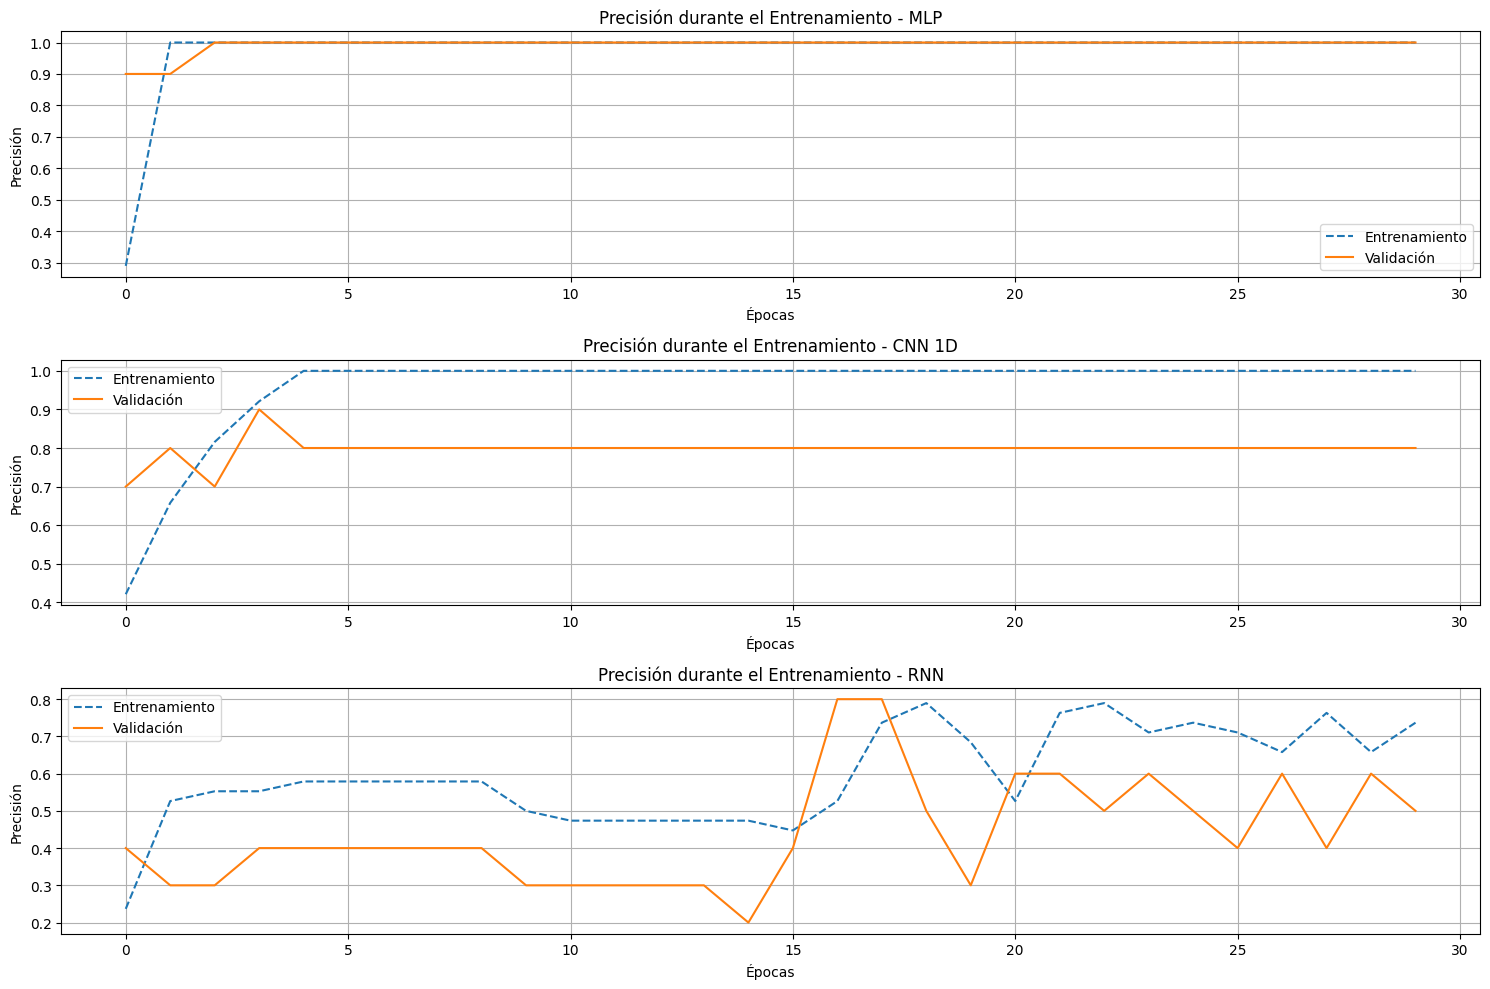

In [67]:
def plot_training_history(histories, model_names):
    plt.figure(figsize=(15, 10))

    for i, (history, model_name) in enumerate(zip(histories, model_names), 1):
        plt.subplot(len(histories), 1, i)  # Crear subgráficos por modelo
        plt.plot(history.history['accuracy'], label='Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label='Validación', linestyle='-')
        plt.title(f"Precisión durante el Entrenamiento - {model_name}")
        plt.xlabel("Épocas")
        plt.ylabel("Precisión")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Consolidar historias de entrenamiento
histories = [history_mlp, history_cnn, history_rnn]
model_names = ["MLP", "CNN 1D", "RNN"]
plot_training_history(histories, model_names)


## 4. VISUALIZACIÓN Y PREDICCION.

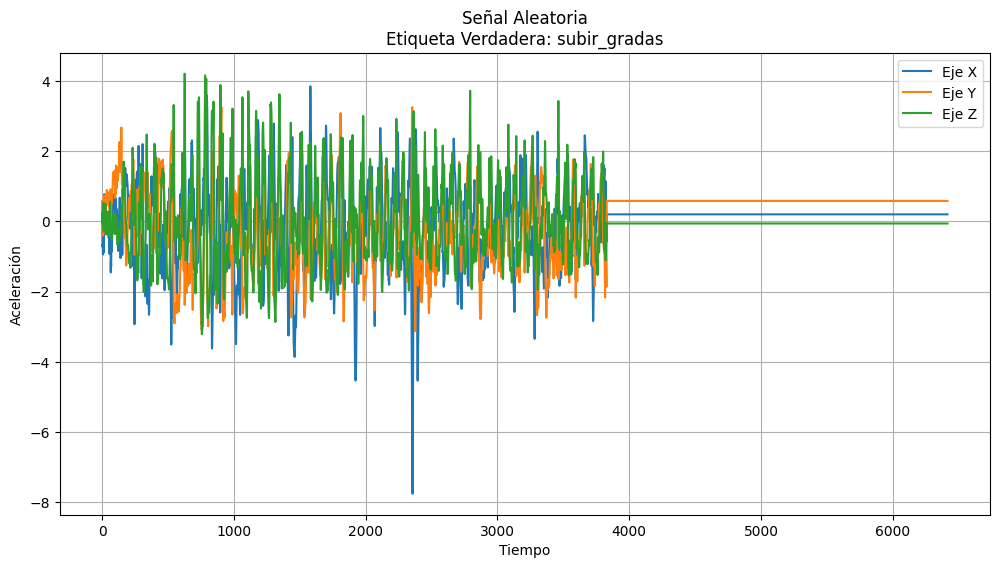

MLP Predicción: subir_gradas
CNN 1D Predicción: subir_gradas
RNN Predicción: caminar


In [70]:
import random

def test_random_plot(models, model_names, X_test, y_test, label_encoder):
    # Seleccionar una muestra aleatoria del conjunto de prueba
    idx = random.randint(0, len(X_test) - 1)
    sample = X_test[idx]
    true_label = np.argmax(y_test[idx])  # Etiqueta verdadera

    # Generar predicciones para cada modelo
    predictions = [np.argmax(model.predict(sample[np.newaxis, :], verbose=0)) for model in models]

    # Decodificar etiquetas
    true_label_decoded = label_encoder.inverse_transform([true_label])[0]
    predicted_labels_decoded = [label_encoder.inverse_transform([pred])[0] for pred in predictions]

    # Graficar la muestra
    plt.figure(figsize=(12, 6))
    plt.plot(sample[:, 0], label='Eje X')
    plt.plot(sample[:, 1], label='Eje Y')
    plt.plot(sample[:, 2], label='Eje Z')
    plt.title(f"Señal Aleatoria\nEtiqueta Verdadera: {true_label_decoded}")
    plt.xlabel("Tiempo")
    plt.ylabel("Aceleración")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostrar predicciones
    for model_name, predicted_label in zip(model_names, predicted_labels_decoded):
        print(f"{model_name} Predicción: {predicted_label}")

# Listado de modelos y nombres
models = [mlp_model, cnn_model, rnn_model]
model_names = ["MLP", "CNN 1D", "RNN"]

# Probar con una muestra aleatoria
test_random_plot(models, model_names, X_test, y_test, label_encoder)


In [71]:
mlp_model.summary()
print('\n------------------------------------------------------------------------------------------------')
cnn_model.summary()
print('\n------------------------------------------------------------------------------------------------')
rnn_model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)                 │ (None, 19248)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 100)                 │       1,924,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,806,517 (22.15 MB)

 Trainable params: 1,935,505 (7.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,871,012 (14.77 MB)


------------------------------------------------------------------------------------------------


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)                   │ (None, 6414, 64)            │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 6412, 64)            │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 3206, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 205184)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 100)                 │      20,518,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,595,993 (234.97 MB)

 Trainable params: 20,531,997 (78.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,063,996 (156.65 MB)


------------------------------------------------------------------------------------------------


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                       │ (None, 100)                 │          41,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,617 (611.79 KB)

 Trainable params: 52,205 (203.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,412 (407.86 KB)

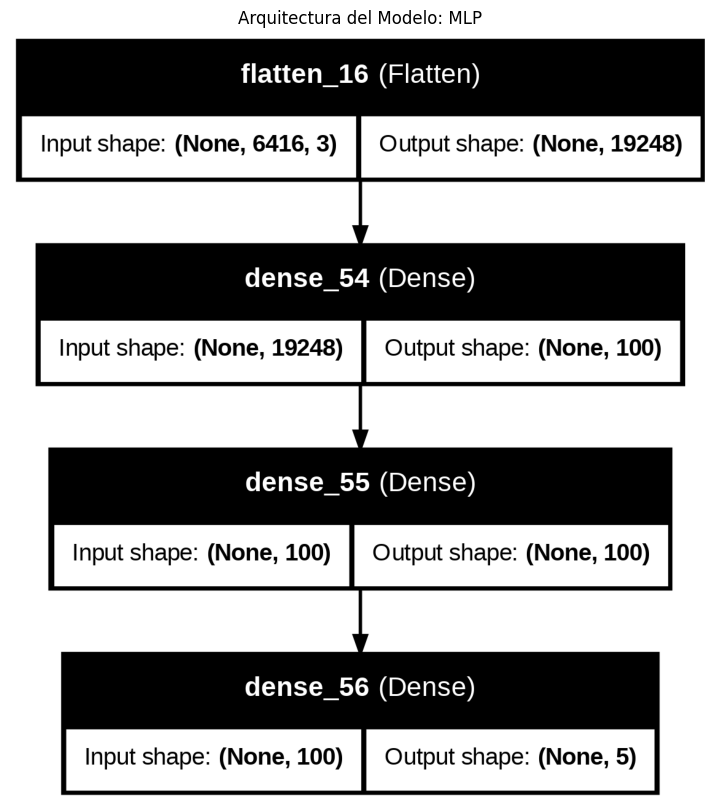

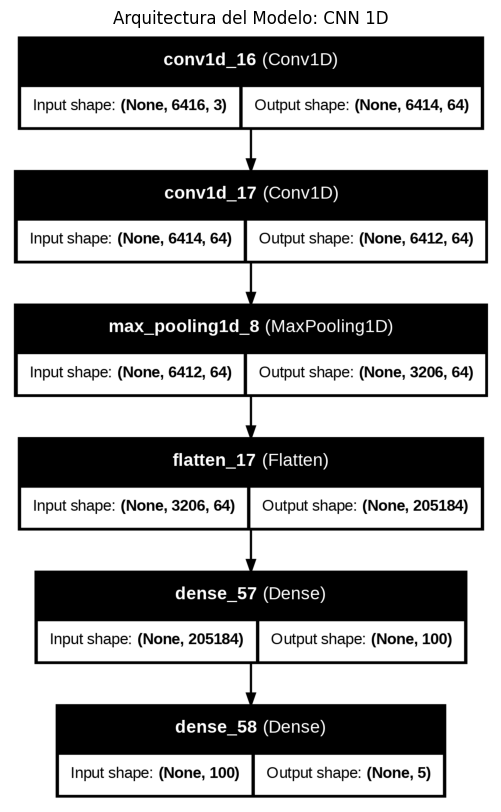

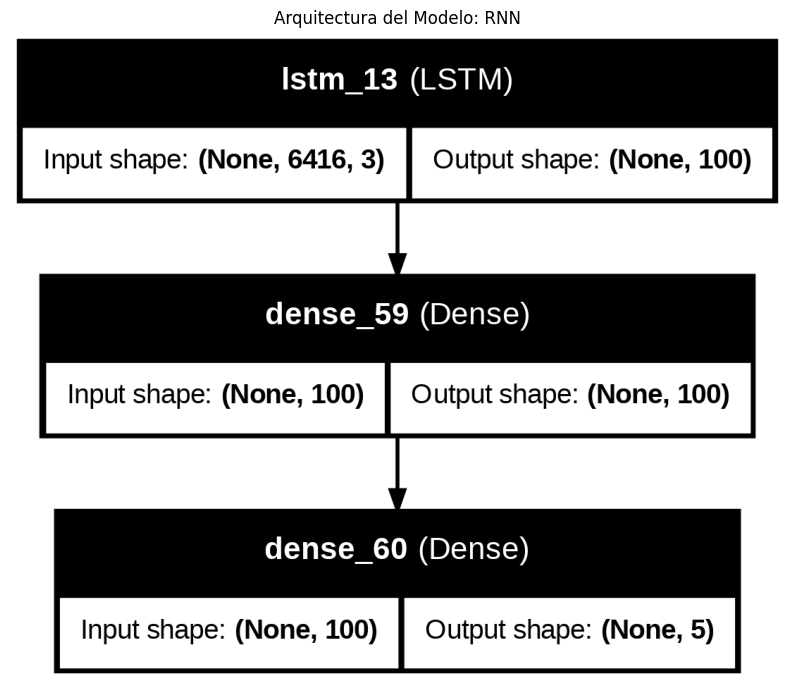

In [73]:
# Presentación de diagramas de modelos

# Función para mostrar el diagrama de un modelo
def display_model_architecture(model, model_name, filename):
    # Guardar el diagrama del modelo
    plot_model(model, to_file=filename, show_shapes=True, show_layer_names=True)
    # Cargar y mostrar la imagen
    image = Image.open(filename)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Arquitectura del Modelo: {model_name}")
    plt.show()

# Generar y mostrar los diagramas
display_model_architecture(mlp_model, "MLP", "mlp_model.png")
display_model_architecture(cnn_model, "CNN 1D", "cnn_model.png")
display_model_architecture(rnn_model, "RNN", "rnn_model.png")
